<a href="https://colab.research.google.com/github/SamuelTelesSilva/Heart_Attack/blob/main/notebook/Heart_attack_analysis_prediction_crisp_dm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Metodologia

**CRISP-DM**

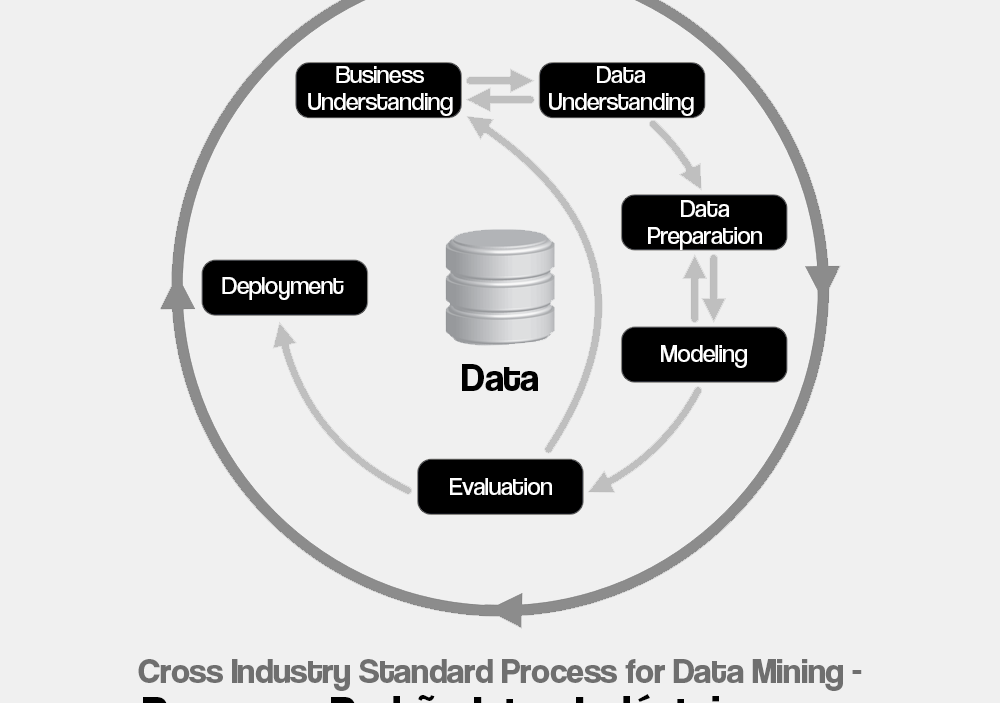

**O que é a metodologia CRISP DM?**

Referência: [Knowsolution](https://www.knowsolution.com.br/voce-sabe-o-que-e-metodologia-crisp-dm-descubra-aqui/)





**Quais são as etapas do processo?**
- **Business understanding** - Entendimento do negócio
- **Data understanding** - Entendimento dos dados
- **Data Preparation** - Preparação dos Dados
- **Modeling** - Modelagem
- **Evaluation** - Avaliação do Modelo
- **Deployment** - Implementação

# **Instalação**

Referência: [Scikit-Plot](https://scikit-plot.readthedocs.io/en/stable/Quickstart.html#installation)

In [1]:
!pip install scikit-plot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Bibliotecas

In [3]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline

from sklearn.preprocessing import LabelEncoder

# Modelos
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

# Metricas
from sklearn.metrics import accuracy_score, classification_report, roc_curve
from sklearn.metrics import log_loss
#
import scikitplot as skplt

# Cross Validation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

# **Business understanding** - Entendimento do negócio
* "Identificar objetivos do negócio sem vieses inconscientes."
* Referência: [Escola.DNC](https://www.escoladnc.com.br/blog/data-science/metodologia-crisp-dm/)
* Referência: [Kaggle](https://www.kaggle.com/datasets/rashikrahmanpritom/heart-attack-analysis-prediction-dataset)

Infarto do miocárdio ou como é conhecido popularmente ataque cardíaco, trata-se de uma doença cardíaca e umas das principais causas de mortes em todo o mundo. Sendo uma doença capaz de causar a morte das células de uma região do músculo do coração por conta da formação de um coágulo que interrompe o fluxo sanguíneo de forma súbita e intensa. É difícil para os médicos preverem quando o paciente terá um ataque cardíaco, pois se trata de uma tarefa complexa que requer muita experiência e conhecimento dentro da área médica. O setor de saúde hoje contém informações ocultas que podem ou poderiam ser importantes durante a tomada de decisões. E a utilização de algoritmos de classificação podem realizar a pesquisa para prever ataques cardíacos. Estes algoritmos ajudariam o setor da saúde à prever padrões entre os pacientes de como está doença se comporta e identificar possiveis chances de um infarto vir a ocorrer.

Ilustração de Bailey Mariner

Referência: [Healthline](https://www.healthline.com/health/heart-attack#heart-attack-definition)


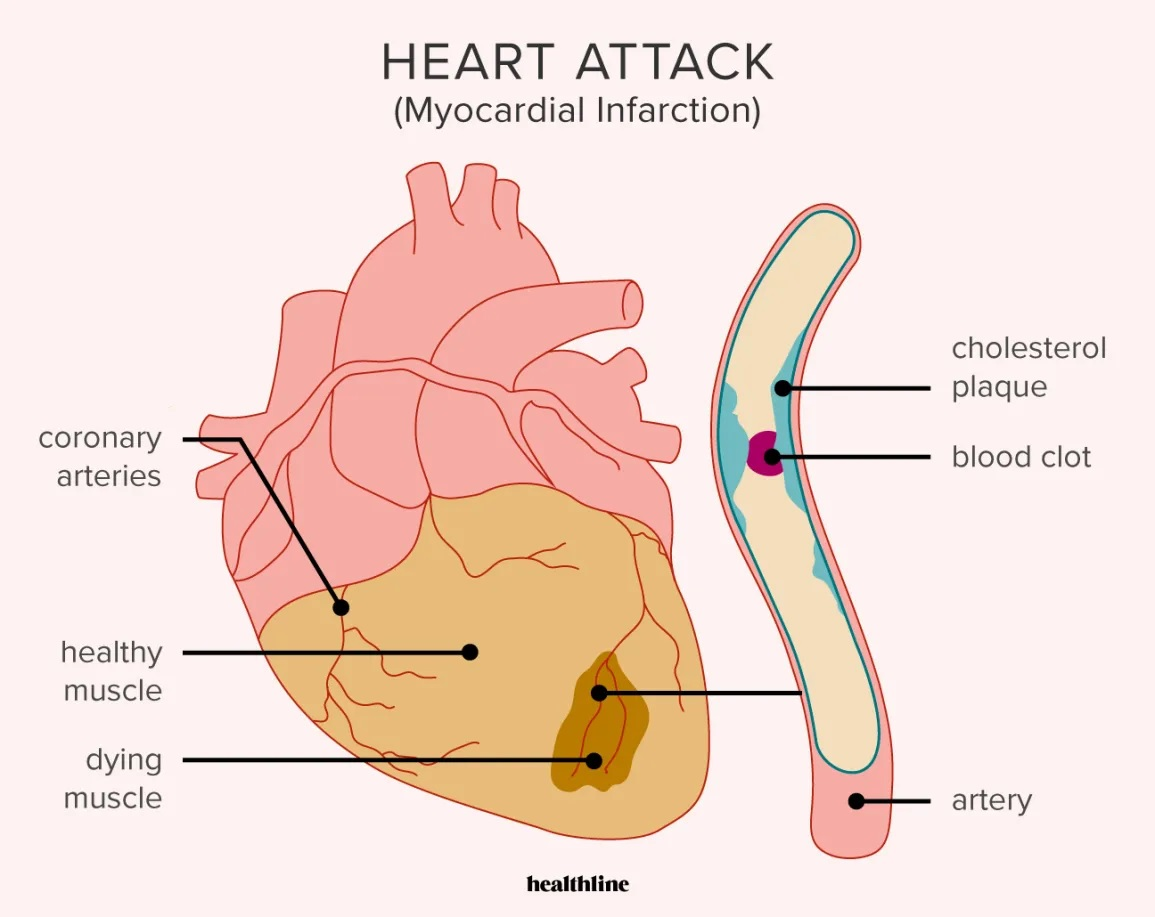

# **Data understanding** - Entendimento dos dados
* Ver de onde virão seus dados e entendê-los de acordo com o objetivo levantado.
* Referência: [Escola.DNC](https://www.escoladnc.com.br/blog/data-science/metodologia-crisp-dm/)
* Referência: [Kaggle](https://www.kaggle.com/datasets/rashikrahmanpritom/heart-attack-analysis-prediction-dataset)

Dataset escolhido foi coletado no site kaggle sendo seu proprietário **RASHIK RAHMAN**.

Nome do Dataset **Heart Attack Analysis & Prediction Dataset
A dataset for heart attack classification**

**Dataset heart**
- **Idade**: Idade do paciente
- **Sexo**: Sexo do paciente (**1: Masculino** , **0: Feminino**)
- **exang**: Angina induzida pelo exercício (**1 = sim**; **0 = não**)
- **caa**: Número de navios principais (**0-3**)

- **cp**: Tipo de dor no peito
    - **Valor 0**: Angina típica
    - **Valor 1**: Angina atípica
    - **Valor 2**: Dor não anginosa
    - **Valor 3**: Assintomático

- **trtbps**: Pressão arterial em repouso (**em mm Hg**)
- **oldpeak**: Previous peak (Pico Anterior)
- **chol**: Colesterol em **mg/dl** obtido através do sensor de **IMC**

- **fbs**: (Glicemia em jejum > 120 **mg/dl**) (**1 = verdadeiro**; **0 = falso**)
- **slp**: Declive
- **rest_ecg**: Resultados eletrocardiográficos em repouso

    - **Valor 0**: Normal
    - **Valor 1**: Com anormalidade da onda **ST-T** (inversões da onda **T** e/ou elevação ou depressão do segmento **ST** > 0,05 **mV**)
    - **Valor 2**: Mostrando provável ou definitiva hipertrofia ventricular esquerda 
- **thall**: Resultado do teste de estresse de tálio ~ (0,3)
- **thalachh**: Frequência cardíaca máxima atingida

- **output**: **0** = menos chance de ataque cardíaco **1** = mais chance de ataque cardíaco

In [4]:
PATH = "/content/drive/MyDrive/datasets/heart.csv"

In [5]:
df_heart = pd.read_csv(PATH)

In [6]:
df_heart.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [7]:
df_heart.shape
print(f'O Dataset contém {df_heart.shape[0]} linhas e {df_heart.shape[1]} colunas.')

O Dataset contém 303 linhas e 14 colunas.


In [8]:
#Checando as variáveis e seus tipos
df_heart.dtypes

age           int64
sex           int64
cp            int64
trtbps        int64
chol          int64
fbs           int64
restecg       int64
thalachh      int64
exng          int64
oldpeak     float64
slp           int64
caa           int64
thall         int64
output        int64
dtype: object

In [9]:
df_heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


# **Data Preparation** - Preparação dos Dados ou "Pré-processamento"
* Referência: [Escola.DNC](https://www.escoladnc.com.br/blog/data-science/metodologia-crisp-dm/)



* Visualização de Dados
* Análise Exploratória de Dados (EDA)
* Pré-processamento

**Inspecionando o DataFrame**

In [10]:
df_heart.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [11]:
df_heart.shape
print(f'O Dataset contém {df_heart.shape[0]} linhas e {df_heart.shape[1]} colunas.')

O Dataset contém 303 linhas e 14 colunas.


In [12]:
#Esta função indica se os valores estão faltando (“NaN“ em matrizes numéricas, “Nenhum” ou “NaN“ em matrizes de objetos, “NaT“ em datetimelike).
df_heart.isna().sum() #Esse df não tem valores nulos

#Obtendo valores vazios ou em porcentagem
#df_heart.isnull().sum()/len(df_heart)*100 em porcentagem

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [13]:
#Checando se há valores duplicados
df_heart[df_heart.duplicated()]

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


In [14]:
#Removendo valores duplicados
df_heart.drop_duplicates(keep='first',inplace=True)

In [15]:
df_heart.shape
print(f'O Dataset contém {df_heart.shape[0]} linhas e {df_heart.shape[1]} colunas.')

O Dataset contém 302 linhas e 14 colunas.


In [16]:
#Checando informações, como variáveis, dados não vazios e tipos de dados
df_heart.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 302 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       302 non-null    int64  
 1   sex       302 non-null    int64  
 2   cp        302 non-null    int64  
 3   trtbps    302 non-null    int64  
 4   chol      302 non-null    int64  
 5   fbs       302 non-null    int64  
 6   restecg   302 non-null    int64  
 7   thalachh  302 non-null    int64  
 8   exng      302 non-null    int64  
 9   oldpeak   302 non-null    float64
 10  slp       302 non-null    int64  
 11  caa       302 non-null    int64  
 12  thall     302 non-null    int64  
 13  output    302 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 35.4 KB


## **Outliers**
Os outliers são dados que se diferenciam drasticamente de todos os outros. Em outras palavras, um outlier é um valor que foge da normalidade.

Para realizar estas etapas serão feitas as seguintes tarefas
- Pré-processamento de dados
  - Identificando e removendo os outliers

In [17]:
#Função para remover outliers
def removerOut(df):
  Q1 = np.quantile(df, 0.25)
  Q3 = np.quantile(df, 0.75)

  #DI Amplitude interquartil
  DI = Q3 - Q1

  cerca_inferior = Q1 - (1.5 * DI)
  cerca_superior = Q3 + (1.5 * DI)

  selecao = (df >= cerca_inferior) & (df <= cerca_superior)
  df_sem_outliers = df[selecao]

  return df_sem_outliers, cerca_inferior, cerca_superior

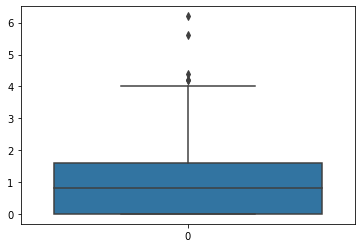

In [18]:
#Gráfico de caixa ajuda a facilitar as comparações entre variáveis ​​ou entre níveis de uma variável categórica
sns.boxplot(data=df_heart['oldpeak'])

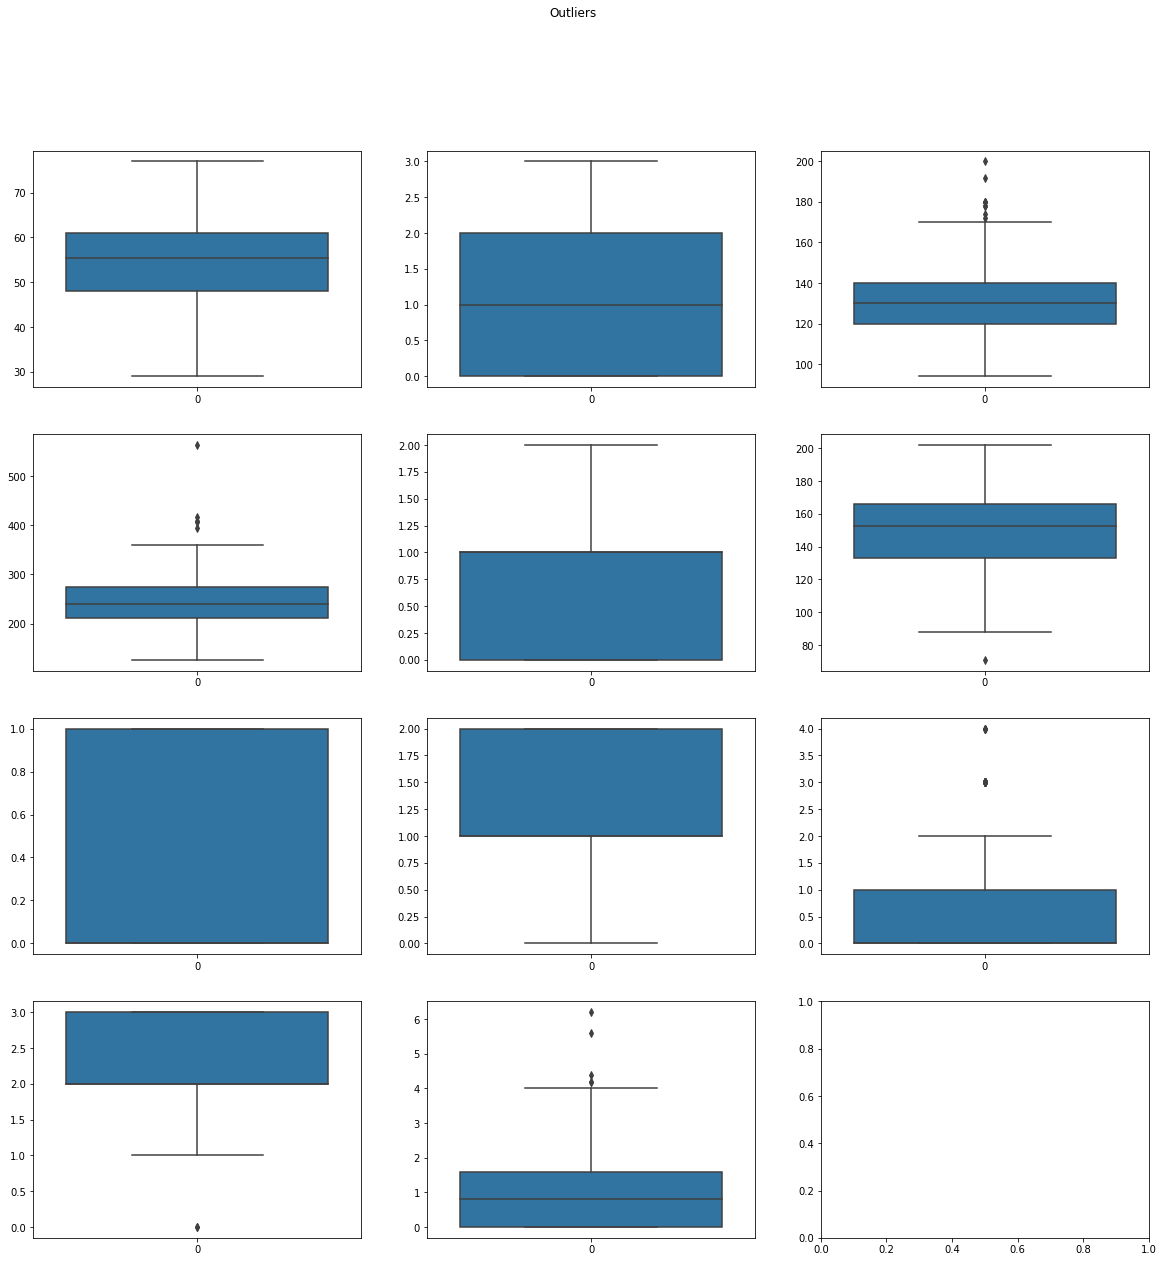

In [19]:
fig, axes = plt.subplots(4, 3, figsize=(20, 20))
fig.suptitle('Outliers')


sns.boxplot(ax=axes[0, 0], data=df_heart['age'])
sns.boxplot(ax=axes[0, 1], data=df_heart['cp'])
sns.boxplot(ax=axes[0, 2], data=df_heart['trtbps'])

sns.boxplot(ax=axes[1, 0], data=df_heart['chol'])
sns.boxplot(ax=axes[1, 1], data=df_heart['restecg'])
sns.boxplot(ax=axes[1, 2], data=df_heart['thalachh'])

sns.boxplot(ax=axes[2, 0], data=df_heart['exng'])
sns.boxplot(ax=axes[2, 1], data=df_heart['slp'])
sns.boxplot(ax=axes[2, 2], data=df_heart['caa']) 

sns.boxplot(ax=axes[3, 0], data=df_heart['thall'])
sns.boxplot(ax=axes[3, 1],data=df_heart['oldpeak'])

**Observação:**

* Notamos que há alguns possíveis outliers, nas colunas **trtbps**, **chol**, **thalachh**, **caa**, **thall** e **oldpeak**.


* Quem são esses outliers? São importante para nossos dados ou será que podemos 
remove-los?



**Verificando a variável trtbps *(Pressão arterial em repouso)***

In [20]:
#Checando o menor e o maior valor da variável
df_heart['trtbps'].min(), df_heart['trtbps'].max()

(94, 200)

In [21]:
df_heart['trtbps'].describe()

count    302.000000
mean     131.602649
std       17.563394
min       94.000000
25%      120.000000
50%      130.000000
75%      140.000000
max      200.000000
Name: trtbps, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


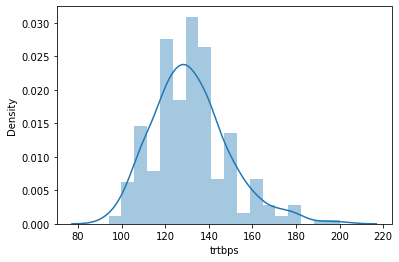

In [22]:
#Distplot usado para um conjunto univariante de observações e o visualizamos por meio de um histograma
sns.distplot(df_heart['trtbps'])

In [23]:
#Removendo os outliers
data, _,_ = removerOut(df_heart['trtbps'])
df_heart['trtbps'] = data

In [24]:
df_heart.isnull().sum()

age         0
sex         0
cp          0
trtbps      9
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


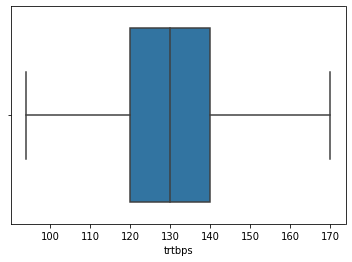

In [25]:
sns.boxplot(df_heart['trtbps'])

**Verificando os outliers da variável chol *(Colesterol em mg/dl obtido através do sensor de IMC)***

In [26]:
df_heart['chol'].min(), df_heart['chol'].max()

(126, 564)

In [27]:
df_heart['chol'].describe()

count    302.000000
mean     246.500000
std       51.753489
min      126.000000
25%      211.000000
50%      240.500000
75%      274.750000
max      564.000000
Name: chol, dtype: float64

In [28]:
data, cerca_inferior, cerca_superior = removerOut(df_heart['chol'])

In [29]:
cerca_superior

370.375

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


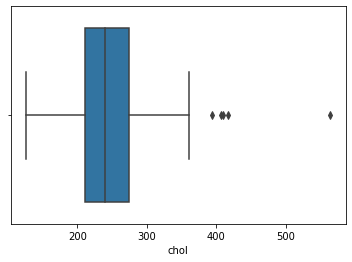

In [30]:
sns.boxplot(df_heart['chol'])

In [31]:
#Verificando quem são possíveis os outliers
df_heart[(df_heart['chol'] > cerca_superior)]

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
28,65,0,2,140.0,417,1,0,157,0,0.8,2,1,2,1
85,67,0,2,115.0,564,0,0,160,0,1.6,1,0,3,1
96,62,0,0,140.0,394,0,0,157,0,1.2,1,0,2,1
220,63,0,0,150.0,407,0,0,154,0,4.0,1,3,3,0
246,56,0,0,134.0,409,0,0,150,1,1.9,1,2,3,0


In [32]:
df_heart['chol'] = data

In [33]:
df_heart['chol'].describe()

count    297.000000
mean     243.272727
std       44.996731
min      126.000000
25%      211.000000
50%      240.000000
75%      273.000000
max      360.000000
Name: chol, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


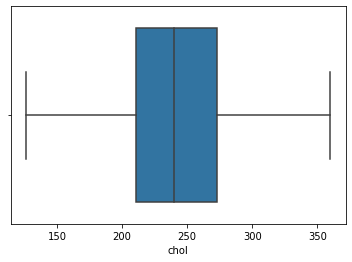

In [34]:
sns.boxplot(df_heart['chol']) #Sem os outliers

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


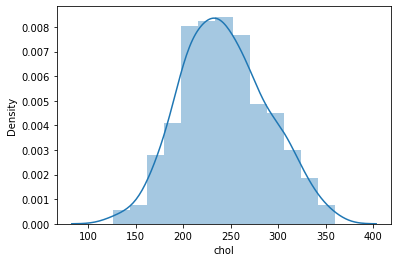

In [35]:
sns.distplot(df_heart['chol']) #Distribuição normal

**Observação:**
* a variável chol tem uma distribuição normal

**Verificando os outliers da variável thalachh *(Frequência cardíaca máxima atingida)***

In [36]:
df_heart['thalachh'].min(), df_heart['thalachh'].max()

(71, 202)

In [37]:
df_heart['thalachh'].describe()

count    302.000000
mean     149.569536
std       22.903527
min       71.000000
25%      133.250000
50%      152.500000
75%      166.000000
max      202.000000
Name: thalachh, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


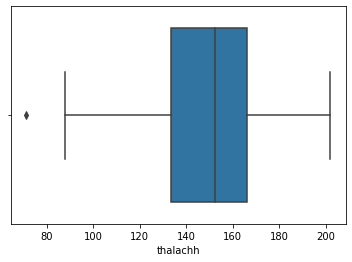

In [38]:
sns.boxplot(df_heart['thalachh'])

In [39]:
#Verificar os limites desta variavel
data, cerca_inferior, cerca_superior = removerOut(df_heart['thalachh'])

In [40]:
cerca_inferior, cerca_superior

(84.125, 215.125)

In [41]:
#Vamos remover
df_heart[(df_heart['thalachh'] < cerca_inferior)]

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
272,67,1,0,120.0,237.0,0,1,71,0,1.0,1,0,2,0


In [42]:
#Removendo o outlier
df_heart['thalachh'] = data

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


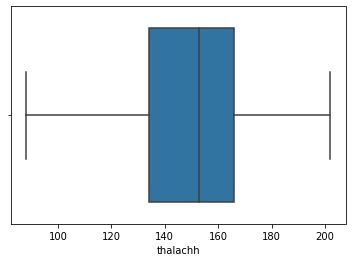

In [43]:
sns.boxplot(df_heart['thalachh'])

In [44]:
df_heart['thalachh'].describe()

count    301.000000
mean     149.830565
std       22.487208
min       88.000000
25%      134.000000
50%      153.000000
75%      166.000000
max      202.000000
Name: thalachh, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


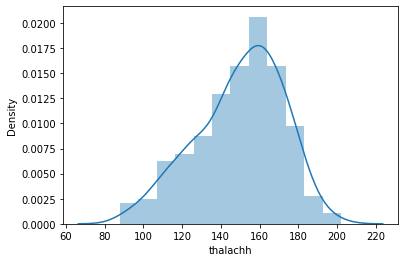

In [45]:
sns.distplot(df_heart['thalachh']) #Distribuição não-normal

**Observação**:
* A variável **thalachh** não possui distribuição normal

**Verificando os outliers da variável oldpeak**

In [46]:
df_heart['oldpeak'].min(), df_heart['oldpeak'].max()

(0.0, 6.2)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


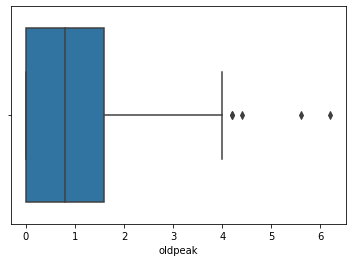

In [47]:
sns.boxplot(df_heart['oldpeak'])

In [48]:
df_heart['oldpeak'].describe()

count    302.000000
mean       1.043046
std        1.161452
min        0.000000
25%        0.000000
50%        0.800000
75%        1.600000
max        6.200000
Name: oldpeak, dtype: float64

In [49]:
#Verificando os limites desta variável
data, cerca_inferior, cerca_superior = removerOut(df_heart['oldpeak'])

In [50]:
cerca_inferior, cerca_superior

(-2.4000000000000004, 4.0)

In [51]:
df_heart[(df_heart['oldpeak'] > cerca_superior)]

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
101,59,1,3,NaN,270.0,0,0,145.0,0,4.2,0,0,3,1
204,62,0,0,160.0,164.0,0,0,145.0,0,6.2,0,3,3,0
221,55,1,0,140.0,217.0,0,1,111.0,1,5.6,0,0,3,0
250,51,1,0,140.0,298.0,0,1,122.0,1,4.2,1,3,3,0
291,58,1,0,114.0,318.0,0,2,140.0,0,4.4,0,3,1,0


In [52]:
df_heart['oldpeak'] = data

In [53]:
df_heart['oldpeak'].describe()

count    297.000000
mean       0.977778
std        1.049796
min        0.000000
25%        0.000000
50%        0.700000
75%        1.600000
max        4.000000
Name: oldpeak, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


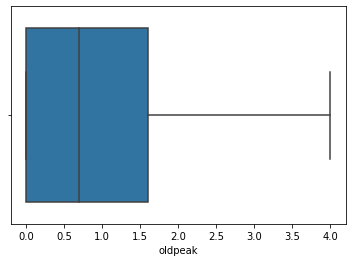

In [54]:
sns.boxplot(df_heart['oldpeak'])

**Observação:**
- Não há muitas informações sobre a variável oldpeak, então foram removidos os possíveis outliers desta variável

## **Manipulação de Dados Faltantes (Missing Values NA)**
- Pré-processamento de dados
  - Identificando e removendo os valores faltantes

Se os dados possuírem uma distribuição simétrica, a média e mediana são relativamente próximas, então, no fim, não fará muita diferença entre optarmos pela média ou mediana. Em caso de uma distribuição assimétrica, a mediana se torna uma melhor escolha, pois a média será influenciada pelos valores na extremidade da distribuição. Logo, a mediana é a melhor representação da maioria dos valores da variável.

- Referência: [Medium](https://medium.com/data-hackers/tratamento-e-transforma%C3%A7%C3%A3o-de-dados-nan-uma-vis%C3%A3o-geral-e-pr%C3%A1tica-54efa9fc7a98)

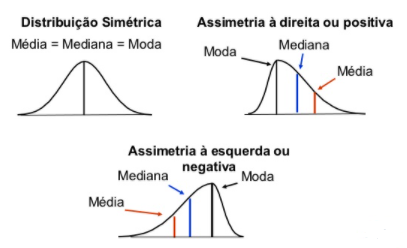

In [55]:
df_heart.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145.0,233.0,1,0,150.0,0,2.3,0,0,1,1
1,37,1,2,130.0,250.0,0,1,187.0,0,3.5,0,0,2,1
2,41,0,1,130.0,204.0,0,0,172.0,0,1.4,2,0,2,1
3,56,1,1,120.0,236.0,0,1,178.0,0,0.8,2,0,2,1
4,57,0,0,120.0,354.0,0,1,163.0,1,0.6,2,0,2,1


In [56]:
#Detectamos 4 variáveis com valores nulos nesta situação
df_heart.isna().sum()

age         0
sex         0
cp          0
trtbps      9
chol        5
fbs         0
restecg     0
thalachh    1
exng        0
oldpeak     5
slp         0
caa         0
thall       0
output      0
dtype: int64

In [57]:
df_heart.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 302 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       302 non-null    int64  
 1   sex       302 non-null    int64  
 2   cp        302 non-null    int64  
 3   trtbps    293 non-null    float64
 4   chol      297 non-null    float64
 5   fbs       302 non-null    int64  
 6   restecg   302 non-null    int64  
 7   thalachh  301 non-null    float64
 8   exng      302 non-null    int64  
 9   oldpeak   297 non-null    float64
 10  slp       302 non-null    int64  
 11  caa       302 non-null    int64  
 12  thall     302 non-null    int64  
 13  output    302 non-null    int64  
dtypes: float64(4), int64(10)
memory usage: 43.5 KB


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


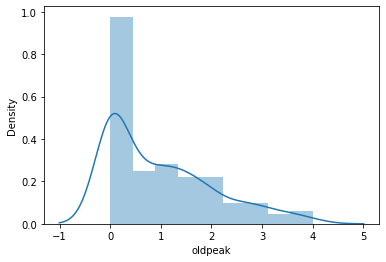

In [58]:
sns.distplot(df_heart['oldpeak'])

In [59]:
df_heart['oldpeak'].describe()

count    297.000000
mean       0.977778
std        1.049796
min        0.000000
25%        0.000000
50%        0.700000
75%        1.600000
max        4.000000
Name: oldpeak, dtype: float64

In [60]:
#Substituindo o valores nulos
df_heart['trtbps'].fillna(df_heart['trtbps'].mean(), inplace=True)
df_heart['chol'].fillna(df_heart['chol'].mean(), inplace=True)

df_heart['thalachh'].fillna(df_heart['thalachh'].mean(), inplace=True)
df_heart['oldpeak'].fillna(df_heart['oldpeak'].mean(), inplace=True)

In [61]:
#Não foram detectados valores nulos
df_heart.isna().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

**Observação:**
- Foi utilizada a média para substituição dos valores nulos

## **Análise Exploratória de Dados (EDA) e Visualização de Dados**


* Referência: [Medium](https://medium.com/turing-talks/turing-talks-9-visualiza%C3%A7%C3%A3o-de-dados-93df670d479)

In [62]:
df_heart.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145.0,233.0,1,0,150.0,0,2.3,0,0,1,1
1,37,1,2,130.0,250.0,0,1,187.0,0,3.5,0,0,2,1
2,41,0,1,130.0,204.0,0,0,172.0,0,1.4,2,0,2,1
3,56,1,1,120.0,236.0,0,1,178.0,0,0.8,2,0,2,1
4,57,0,0,120.0,354.0,0,1,163.0,1,0.6,2,0,2,1


In [63]:
#Tamanho anterior do DataFrame era de (303,14)
df_heart.shape
print(f'O Dataset contém {df_heart.shape[0]} linhas e {df_heart.shape[1]} colunas.')

O Dataset contém 302 linhas e 14 colunas.


In [64]:
df_heart.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 302 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       302 non-null    int64  
 1   sex       302 non-null    int64  
 2   cp        302 non-null    int64  
 3   trtbps    302 non-null    float64
 4   chol      302 non-null    float64
 5   fbs       302 non-null    int64  
 6   restecg   302 non-null    int64  
 7   thalachh  302 non-null    float64
 8   exng      302 non-null    int64  
 9   oldpeak   302 non-null    float64
 10  slp       302 non-null    int64  
 11  caa       302 non-null    int64  
 12  thall     302 non-null    int64  
 13  output    302 non-null    int64  
dtypes: float64(4), int64(10)
memory usage: 43.5 KB


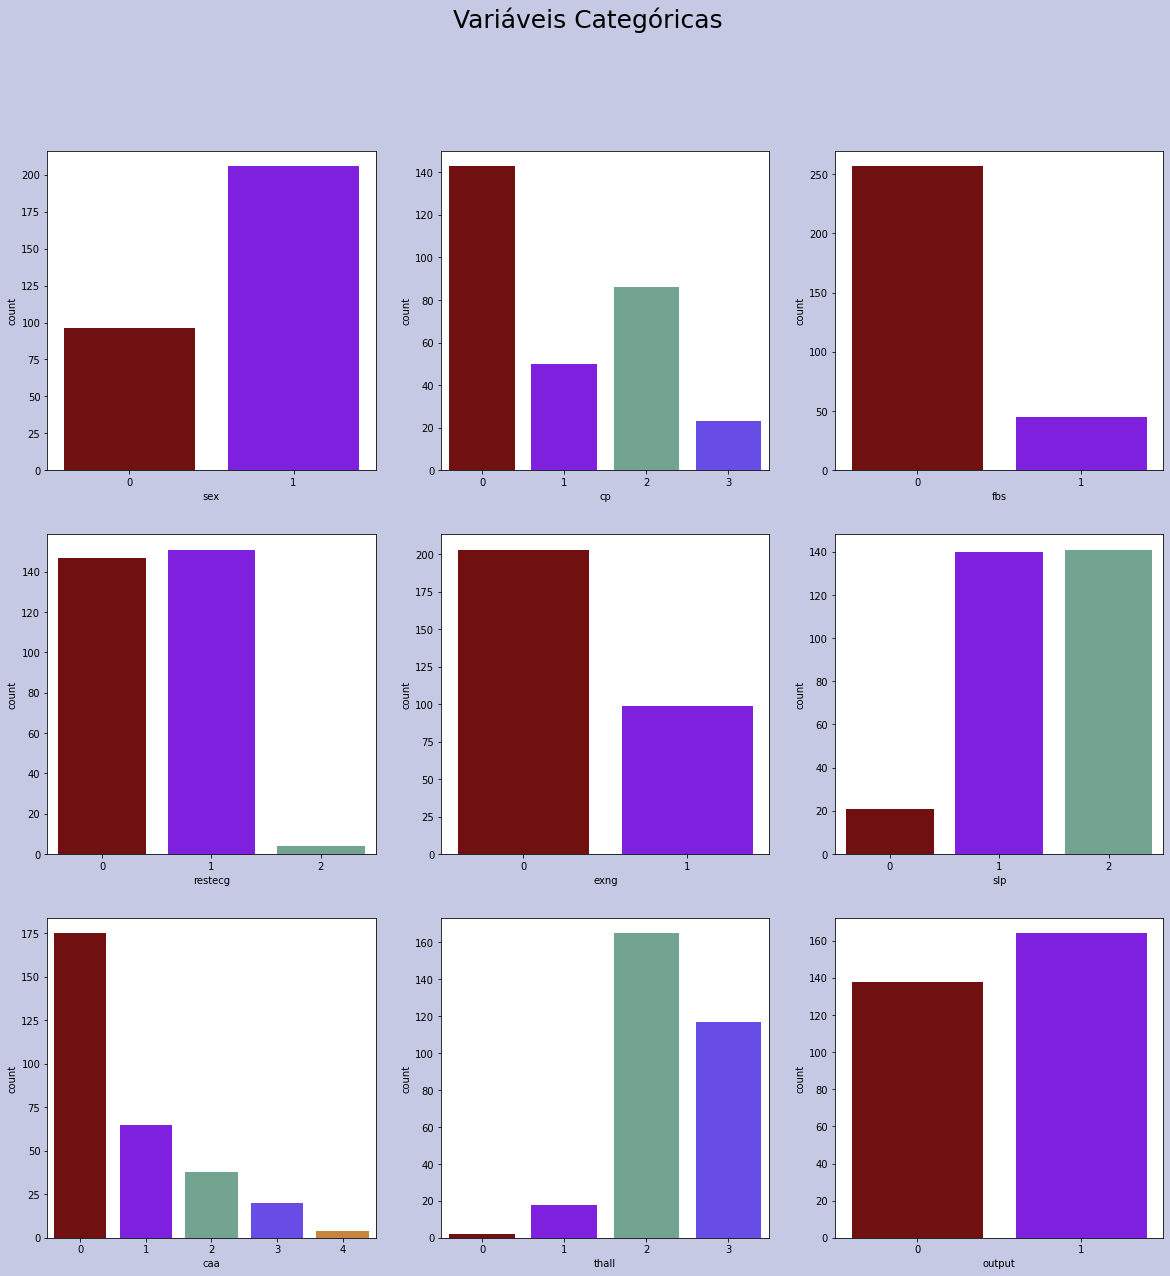

In [65]:
fig, axes = plt.subplots(3, 3, figsize=(20, 20))
fig.suptitle('Variáveis Categóricas', fontsize=25)

background_color = "#C5C9E3"
color_palette = ["#800000","#8000ff","#6aac90","#5833ff","#da8829"]
fig.patch.set_facecolor(background_color) 


sns.countplot(ax=axes[0, 0], data=df_heart, x='sex', palette= color_palette)
sns.countplot(ax=axes[0, 1], data=df_heart, x='cp', palette= color_palette)
sns.countplot(ax=axes[0, 2], data=df_heart, x='fbs', palette= color_palette)

sns.countplot(ax=axes[1, 0], data=df_heart, x='restecg', palette= color_palette)
sns.countplot(ax=axes[1, 1], data=df_heart, x='exng', palette= color_palette)
sns.countplot(ax=axes[1, 2], data=df_heart, x='slp', palette= color_palette)

sns.countplot(ax=axes[2, 0], data=df_heart, x='caa', palette= color_palette)
sns.countplot(ax=axes[2, 1], data=df_heart, x='thall', palette= color_palette)
sns.countplot(ax=axes[2, 2], data=df_heart, x='output', palette= color_palette)



Text(0, 0.5, '')

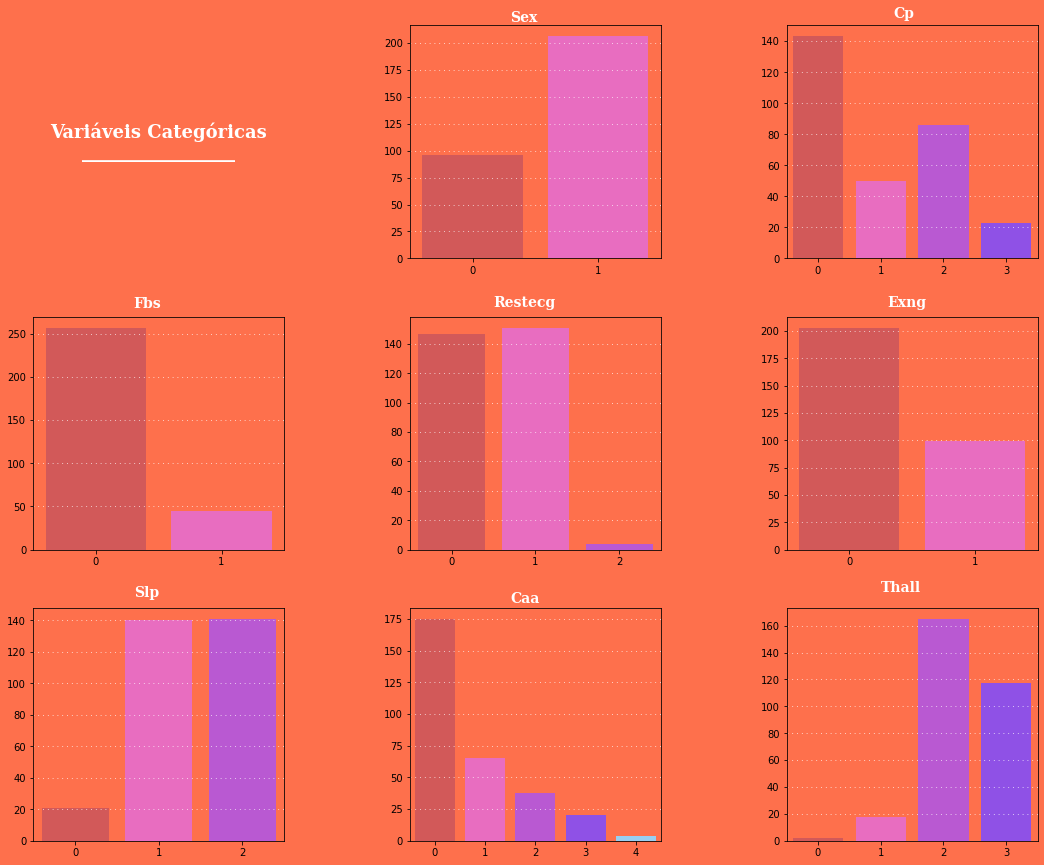

In [66]:
fig = plt.figure(figsize=(18,15))
gs = fig.add_gridspec(3,3)
gs.update(wspace=0.5, hspace=0.25)


ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])
ax2 = fig.add_subplot(gs[0,2])
ax3 = fig.add_subplot(gs[1,0])
ax4 = fig.add_subplot(gs[1,1])
ax5 = fig.add_subplot(gs[1,2])
ax6 = fig.add_subplot(gs[2,0])
ax7 = fig.add_subplot(gs[2,1])
ax8 = fig.add_subplot(gs[2,2])


#Cores do grid
background_color = "#FE704C"
color_palette = ["#E64545","#FC58C8","#C545E6","#8B38FF","#8BD3FF"]
fig.patch.set_facecolor(background_color) 


ax0.set_facecolor(background_color) 
ax1.set_facecolor(background_color) 
ax2.set_facecolor(background_color) 
ax3.set_facecolor(background_color) 
ax4.set_facecolor(background_color) 
ax5.set_facecolor(background_color) 
ax6.set_facecolor(background_color) 
ax7.set_facecolor(background_color) 
ax8.set_facecolor(background_color)



# Removendo as bordas do grafico e colocando um titulo no lugar do grafico
ax0.spines["bottom"].set_visible(False)
ax0.spines["left"].set_visible(False)
ax0.spines["top"].set_visible(False)
ax0.spines["right"].set_visible(False)
ax0.tick_params(left=False, bottom=False)
ax0.set_xticklabels([])
ax0.set_yticklabels([])
ax0.text(0.5,0.5,
         'Variáveis Categóricas\n_________________',
         horizontalalignment='center',
         verticalalignment='center',
         fontsize=18, fontweight='bold',
         fontfamily='serif',
         color="#FFFFFF")

# Sex count
ax1.text(0.3, 220, 'Sex', fontsize=14, fontweight='bold', fontfamily='serif', color="#FFFFFF")
ax1.grid(color='#FFFFFF', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax1, data=df_heart, x='sex', palette=color_palette)
ax1.set_xlabel("")
ax1.set_ylabel("")

# CP count
ax2.text(1.2, 155, 'Cp', fontsize=14, fontweight='bold', fontfamily='serif', color="#FFFFFF")
ax2.grid(color='#FFFFFF', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax2, data=df_heart, x='cp', palette=color_palette)
ax2.set_xlabel("")
ax2.set_ylabel("")

# Fbs count
ax3.text(0.3, 280, 'Fbs', fontsize=14, fontweight='bold', fontfamily='serif', color="#FFFFFF")
ax3.grid(color='#FFFFFF', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax3, data=df_heart, x='fbs', palette=color_palette)
ax3.set_xlabel("")
ax3.set_ylabel("")


# Restecg count
ax4.text(0.5, 165, 'Restecg', fontsize=14, fontweight='bold', fontfamily='serif', color="#FFFFFF")
ax4.grid(color='#FFFFFF', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax4, data=df_heart, x='restecg', palette=color_palette)
ax4.set_xlabel("")
ax4.set_ylabel("")

# Exng count
ax5.text(0.3, 222, 'Exng', fontsize=14, fontweight='bold', fontfamily='serif', color="#FFFFFF")
ax5.grid(color='#FFFFFF', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax5, data=df_heart, x='exng', palette=color_palette)
ax5.set_xlabel("")
ax5.set_ylabel("")


# Slp count
ax6.text(0.7, 155, 'Slp', fontsize=14, fontweight='bold', fontfamily='serif', color="#FFFFFF")
ax6.grid(color='#FFFFFF', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax6, data=df_heart, x='slp', palette=color_palette)
ax6.set_xlabel("")
ax6.set_ylabel("")

# Caa count
ax7.text(1.5, 188, 'Caa', fontsize=14, fontweight='bold', fontfamily='serif', color="#FFFFFF")
ax7.grid(color='#FFFFFF', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax7, data=df_heart, x='caa', palette=color_palette)
ax7.set_xlabel("")
ax7.set_ylabel("")

# Thall count
ax8.text(1, 185, 'Thall', fontsize=14, fontweight='bold', fontfamily='serif', color="#FFFFFF")
ax8.grid(color='#FFFFFF', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax8, data=df_heart, x='thall', palette=color_palette)
ax8.set_xlabel("")
ax8.set_ylabel("")


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


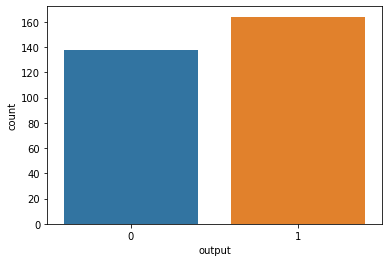

In [67]:
sns.countplot(df_heart['output'])

Observação:

- A variável **output** igual a **0**, tem 46% dos dados (menos chance de ataque cardíaco)
- A variável **output** igual a **1**, tem 54% dos dados (maior chance de ataque cardíaco)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


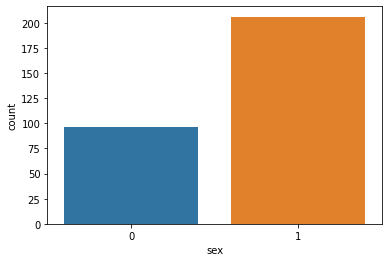

In [68]:
sns.countplot(df_heart['sex'])

Observação:

- O dataset tem 32% de dados das pessoas do **sexo 0** (**Feminino**)
- O dataset tem 68% de dados das pessoas do **sexo 1** (**Masculino**)
- Podemos ver uma grande diferença de dados entre os dois sexos

In [69]:
df_heart[(df_heart['sex'] == 0) & (df_heart['output'] == 1)].count()

age         72
sex         72
cp          72
trtbps      72
chol        72
fbs         72
restecg     72
thalachh    72
exng        72
oldpeak     72
slp         72
caa         72
thall       72
output      72
dtype: int64

In [70]:
df_heart[(df_heart['sex'] == 1) & (df_heart['output'] == 1)].count()

age         92
sex         92
cp          92
trtbps      92
chol        92
fbs         92
restecg     92
thalachh    92
exng        92
oldpeak     92
slp         92
caa         92
thall       92
output      92
dtype: int64

In [71]:
#df_heart[df_heart['output'] == 1].count().output
72+92

164

In [72]:
#sexo 0
np.around((72/164) * 100)

44.0

In [73]:
#sexo 1
np.around((92/164) * 100)

56.0

Observação:
- Pessoas do **sexo 0** (**Feminino**) e com chance de ter uma ataque cardiaco, corresponde à 44% do dataset

- Pessoas do **sexo 1** (**Masculino**) e com chance de ter uma ataque cardiaco, corresponde à 56% do dataset

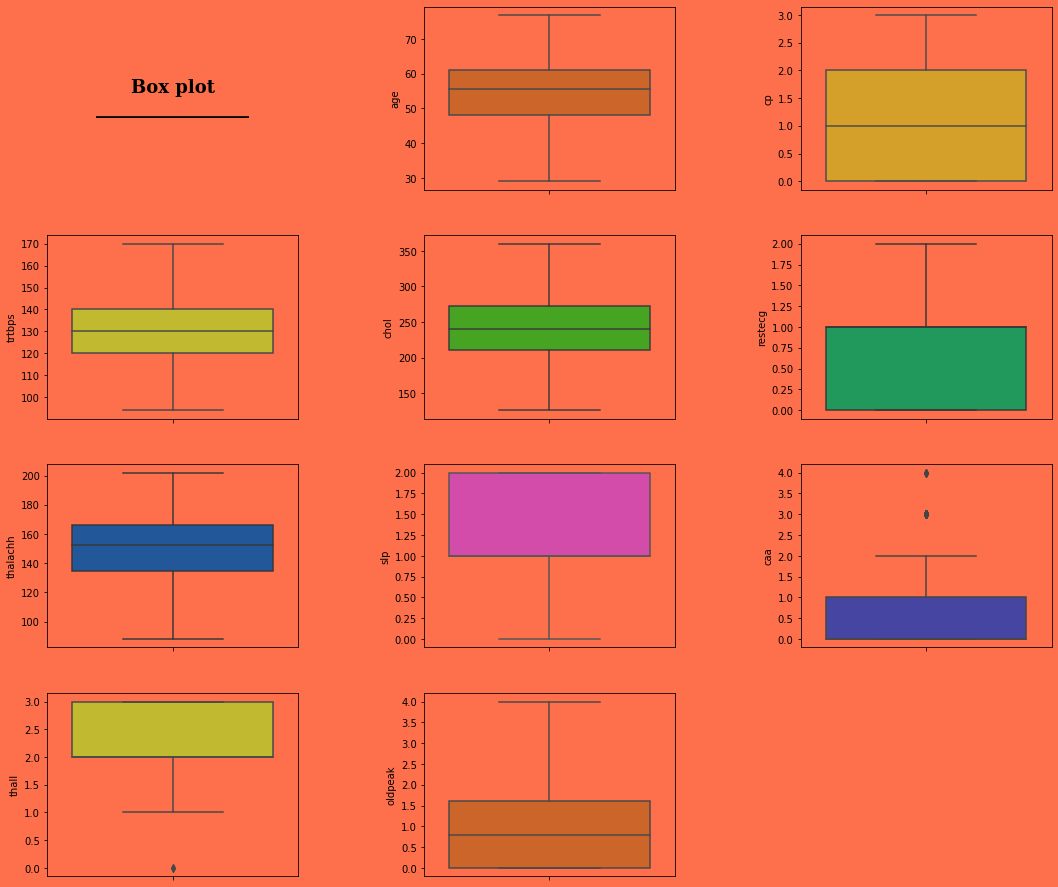

In [74]:
fig = plt.figure(figsize=(18,16))
gs = fig.add_gridspec(4,3)
gs.update(wspace=0.5, hspace=0.25)


ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])
ax2 = fig.add_subplot(gs[0,2])
ax3 = fig.add_subplot(gs[1,0])
ax4 = fig.add_subplot(gs[1,1])
ax5 = fig.add_subplot(gs[1,2])
ax6 = fig.add_subplot(gs[2,0])
ax7 = fig.add_subplot(gs[2,1])
ax8 = fig.add_subplot(gs[2,2])
ax9 = fig.add_subplot(gs[3,0])
ax10 = fig.add_subplot(gs[3,1])

#Cores do grid
background_color = "#FE704C"
color_palette = ["#E64545","#FC58C8","#C545E6","#8B38FF","#8BD3FF"]
fig.patch.set_facecolor(background_color) 


ax0.set_facecolor(background_color) 
ax1.set_facecolor(background_color) 
ax2.set_facecolor(background_color) 
ax3.set_facecolor(background_color) 
ax4.set_facecolor(background_color) 
ax5.set_facecolor(background_color) 
ax6.set_facecolor(background_color) 
ax7.set_facecolor(background_color) 
ax8.set_facecolor(background_color)
ax9.set_facecolor(background_color)
ax10.set_facecolor(background_color)

# Title of the plot
ax0.spines["bottom"].set_visible(False)
ax0.spines["left"].set_visible(False)
ax0.spines["top"].set_visible(False)
ax0.spines["right"].set_visible(False)
ax0.tick_params(left=False, bottom=False)
ax0.set_xticklabels([])
ax0.set_yticklabels([])
ax0.text(0.5,0.5,
         'Box plot\n_________________',
         horizontalalignment='center',
         verticalalignment='center',
         fontsize=18, fontweight='bold',
         fontfamily='serif',
         color="#000000")


sns.boxplot(ax=ax1, y=df_heart['age'], palette=["#E65E0E"])
sns.boxplot(ax=ax2, y=df_heart['cp'], palette=["#F0AB0E"])
sns.boxplot(ax=ax3, y=df_heart['trtbps'], palette=["#D9CF18"])

sns.boxplot(ax=ax4, y=df_heart['chol'], palette=["#3EB90E"])
sns.boxplot(ax=ax5, y=df_heart['restecg'], palette=["#0EAD5C"])
sns.boxplot(ax=ax6, y=df_heart['thalachh'], palette=["#0E55AD"])

sns.boxplot(ax=ax7, y=df_heart['slp'], palette=["#EB35B2"])
sns.boxplot(ax=ax8, y=df_heart['caa'], palette=["#3735B2"])
sns.boxplot(ax=ax9, y=df_heart['thall'], palette=["#D9CF18"])

sns.boxplot(ax=ax10,y=df_heart['oldpeak'], palette=["#E65E0E"])


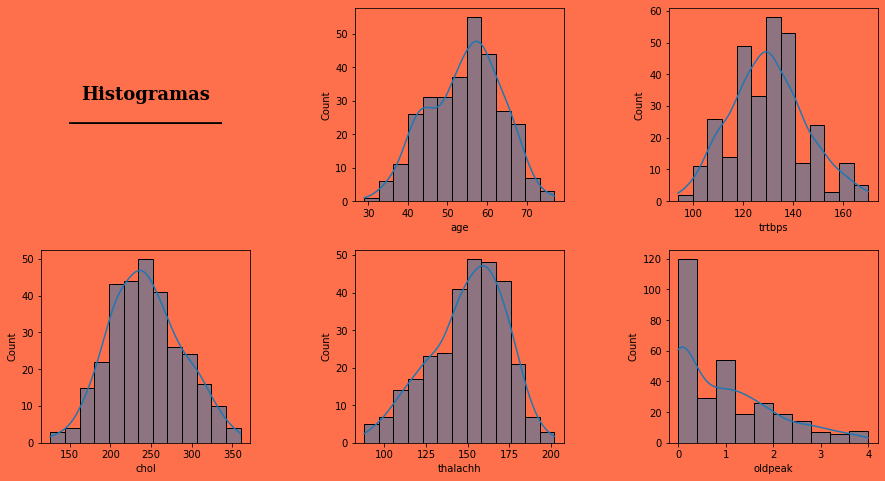

In [75]:
fig = plt.figure(figsize=(15,8))
gs = fig.add_gridspec(2,3)
gs.update(wspace=0.5, hspace=0.25)


ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])
ax2 = fig.add_subplot(gs[0,2])
ax3 = fig.add_subplot(gs[1,0])
ax4 = fig.add_subplot(gs[1,1])
ax5 = fig.add_subplot(gs[1,2])


#Cores do grid
background_color = "#FE704C"
color_palette = ["#E64545","#FC58C8","#C545E6","#8B38FF","#8BD3FF"]
fig.patch.set_facecolor(background_color) 


ax0.set_facecolor(background_color) 
ax1.set_facecolor(background_color) 
ax2.set_facecolor(background_color) 
ax3.set_facecolor(background_color) 
ax4.set_facecolor(background_color) 
ax5.set_facecolor(background_color) 


# Title of the plot
ax0.spines["bottom"].set_visible(False)
ax0.spines["left"].set_visible(False)
ax0.spines["top"].set_visible(False)
ax0.spines["right"].set_visible(False)
ax0.tick_params(left=False, bottom=False)
ax0.set_xticklabels([])
ax0.set_yticklabels([])
ax0.text(0.5,0.5,
         'Histogramas\n_________________',
         horizontalalignment='center',
         verticalalignment='center',
         fontsize=18, fontweight='bold',
         fontfamily='serif',
         color="#000000")


sns.histplot(df_heart['age'], ax=ax1, kde=True)
sns.histplot(df_heart['trtbps'], ax=ax2, kde=True)
sns.histplot(df_heart['chol'], ax=ax3, kde=True)
sns.histplot(df_heart['thalachh'], ax=ax4, kde=True)
sns.histplot(df_heart['oldpeak'], ax=ax5, kde=True)


Observação:
- Os histogramas das variáveis **age**, **trtbps**, **thalachh** e **oldpeak**, aparentam não ter uma distribuição normal.
- A variável **chol** aparenta ter uma distribuição normal.

**Correlação**

 - Referência: [Aprenda Data Science](https://www.aprendadatascience.com/blog/introdu%C3%A7%C3%A3o-a-correla%C3%A7%C3%A3o)

 - Referência: [Medium](https://medium.com/@ds.m/scatter-plot-6fa3a954975f)

Qualquer relação estatística (causal ou não causal) entre duas variáveis. Varia entre $-1$ e $1$:

* $0$ - Nenhuma correlação
* $+1$ - Correlação/Associação positiva perfeita
* $-1$ - Correlação/Associação negativa perfeita

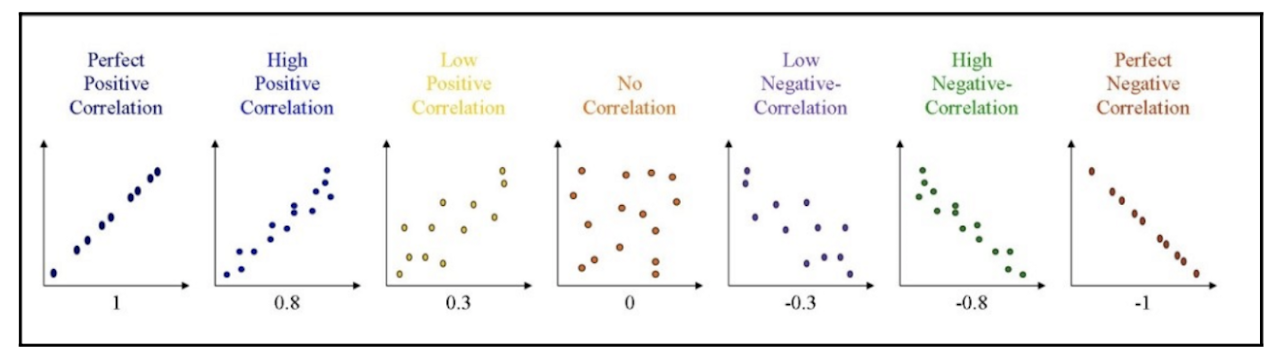

In [76]:
df_heart.corr()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
age,1.000000,-0.094962,-0.063107,0.276288,0.168898,0.119492,-0.111590,-0.387004,0.093216,0.209328,-0.164124,0.302261,0.065317,-0.221476
sex,-0.094962,1.000000,-0.051740,-0.013066,-0.120707,0.046022,-0.060351,-0.039427,0.143460,0.102554,-0.032990,0.113060,0.211452,-0.283609
cp,-0.063107,-0.051740,1.000000,0.066021,-0.087889,0.096018,0.041561,0.288404,-0.392937,-0.134820,0.116854,-0.195356,-0.160370,0.432080
trtbps,0.276288,-0.013066,0.066021,1.000000,0.094037,0.120022,-0.150277,-0.074566,0.004968,0.147334,-0.089723,0.122761,0.010706,-0.120427
chol,0.168898,-0.120707,-0.087889,0.094037,1.000000,0.007306,-0.098564,-0.029654,0.098694,0.009813,0.026282,0.078870,0.070554,-0.111749
fbs,0.119492,0.046022,0.096018,0.120022,0.007306,1.000000,-0.083081,-0.012188,0.024729,0.031315,-0.058654,0.144935,-0.032752,-0.026826
restecg,-0.111590,-0.060351,0.041561,-0.150277,-0.098564,-0.083081,1.000000,0.052544,-0.068807,-0.088912,0.090402,-0.083112,-0.010473,0.134874
thalachh,-0.387004,-0.039427,0.288404,-0.074566,-0.029654,-0.012188,0.052544,1.000000,-0.393172,-0.341137,0.385008,-0.241251,-0.102814,0.415746
exng,0.093216,0.143460,-0.392937,0.004968,0.098694,0.024729,-0.068807,-0.393172,1.000000,0.310549,-0.256106,0.125377,0.205826,-0.435601
oldpeak,0.209328,0.102554,-0.134820,0.147334,0.009813,0.031315,-0.088912,-0.341137,0.310549,1.000000,-0.517030,0.195970,0.198572,-0.430931


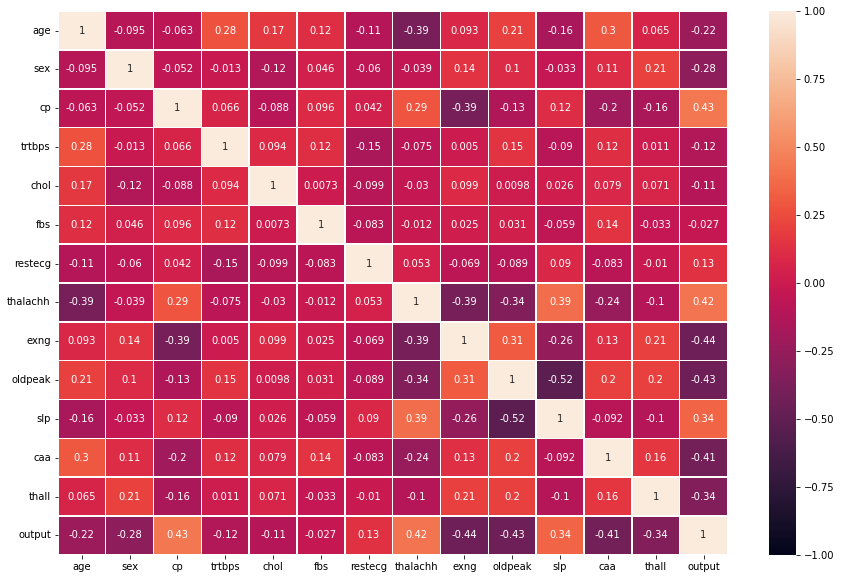

In [77]:
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(df_heart.corr(), annot=True, linewidths=.5, ax=ax, vmin=-1, vmax=1)


# - Os argumentos vmin e vmax indicam que os valores:
#    mínimo e máximo da correlação são -1 e 1
# - O parâmetro annot faz com que a correlação seja escrita
#   dentro dos retângulos

**Dispersão (Scatter Plots)**

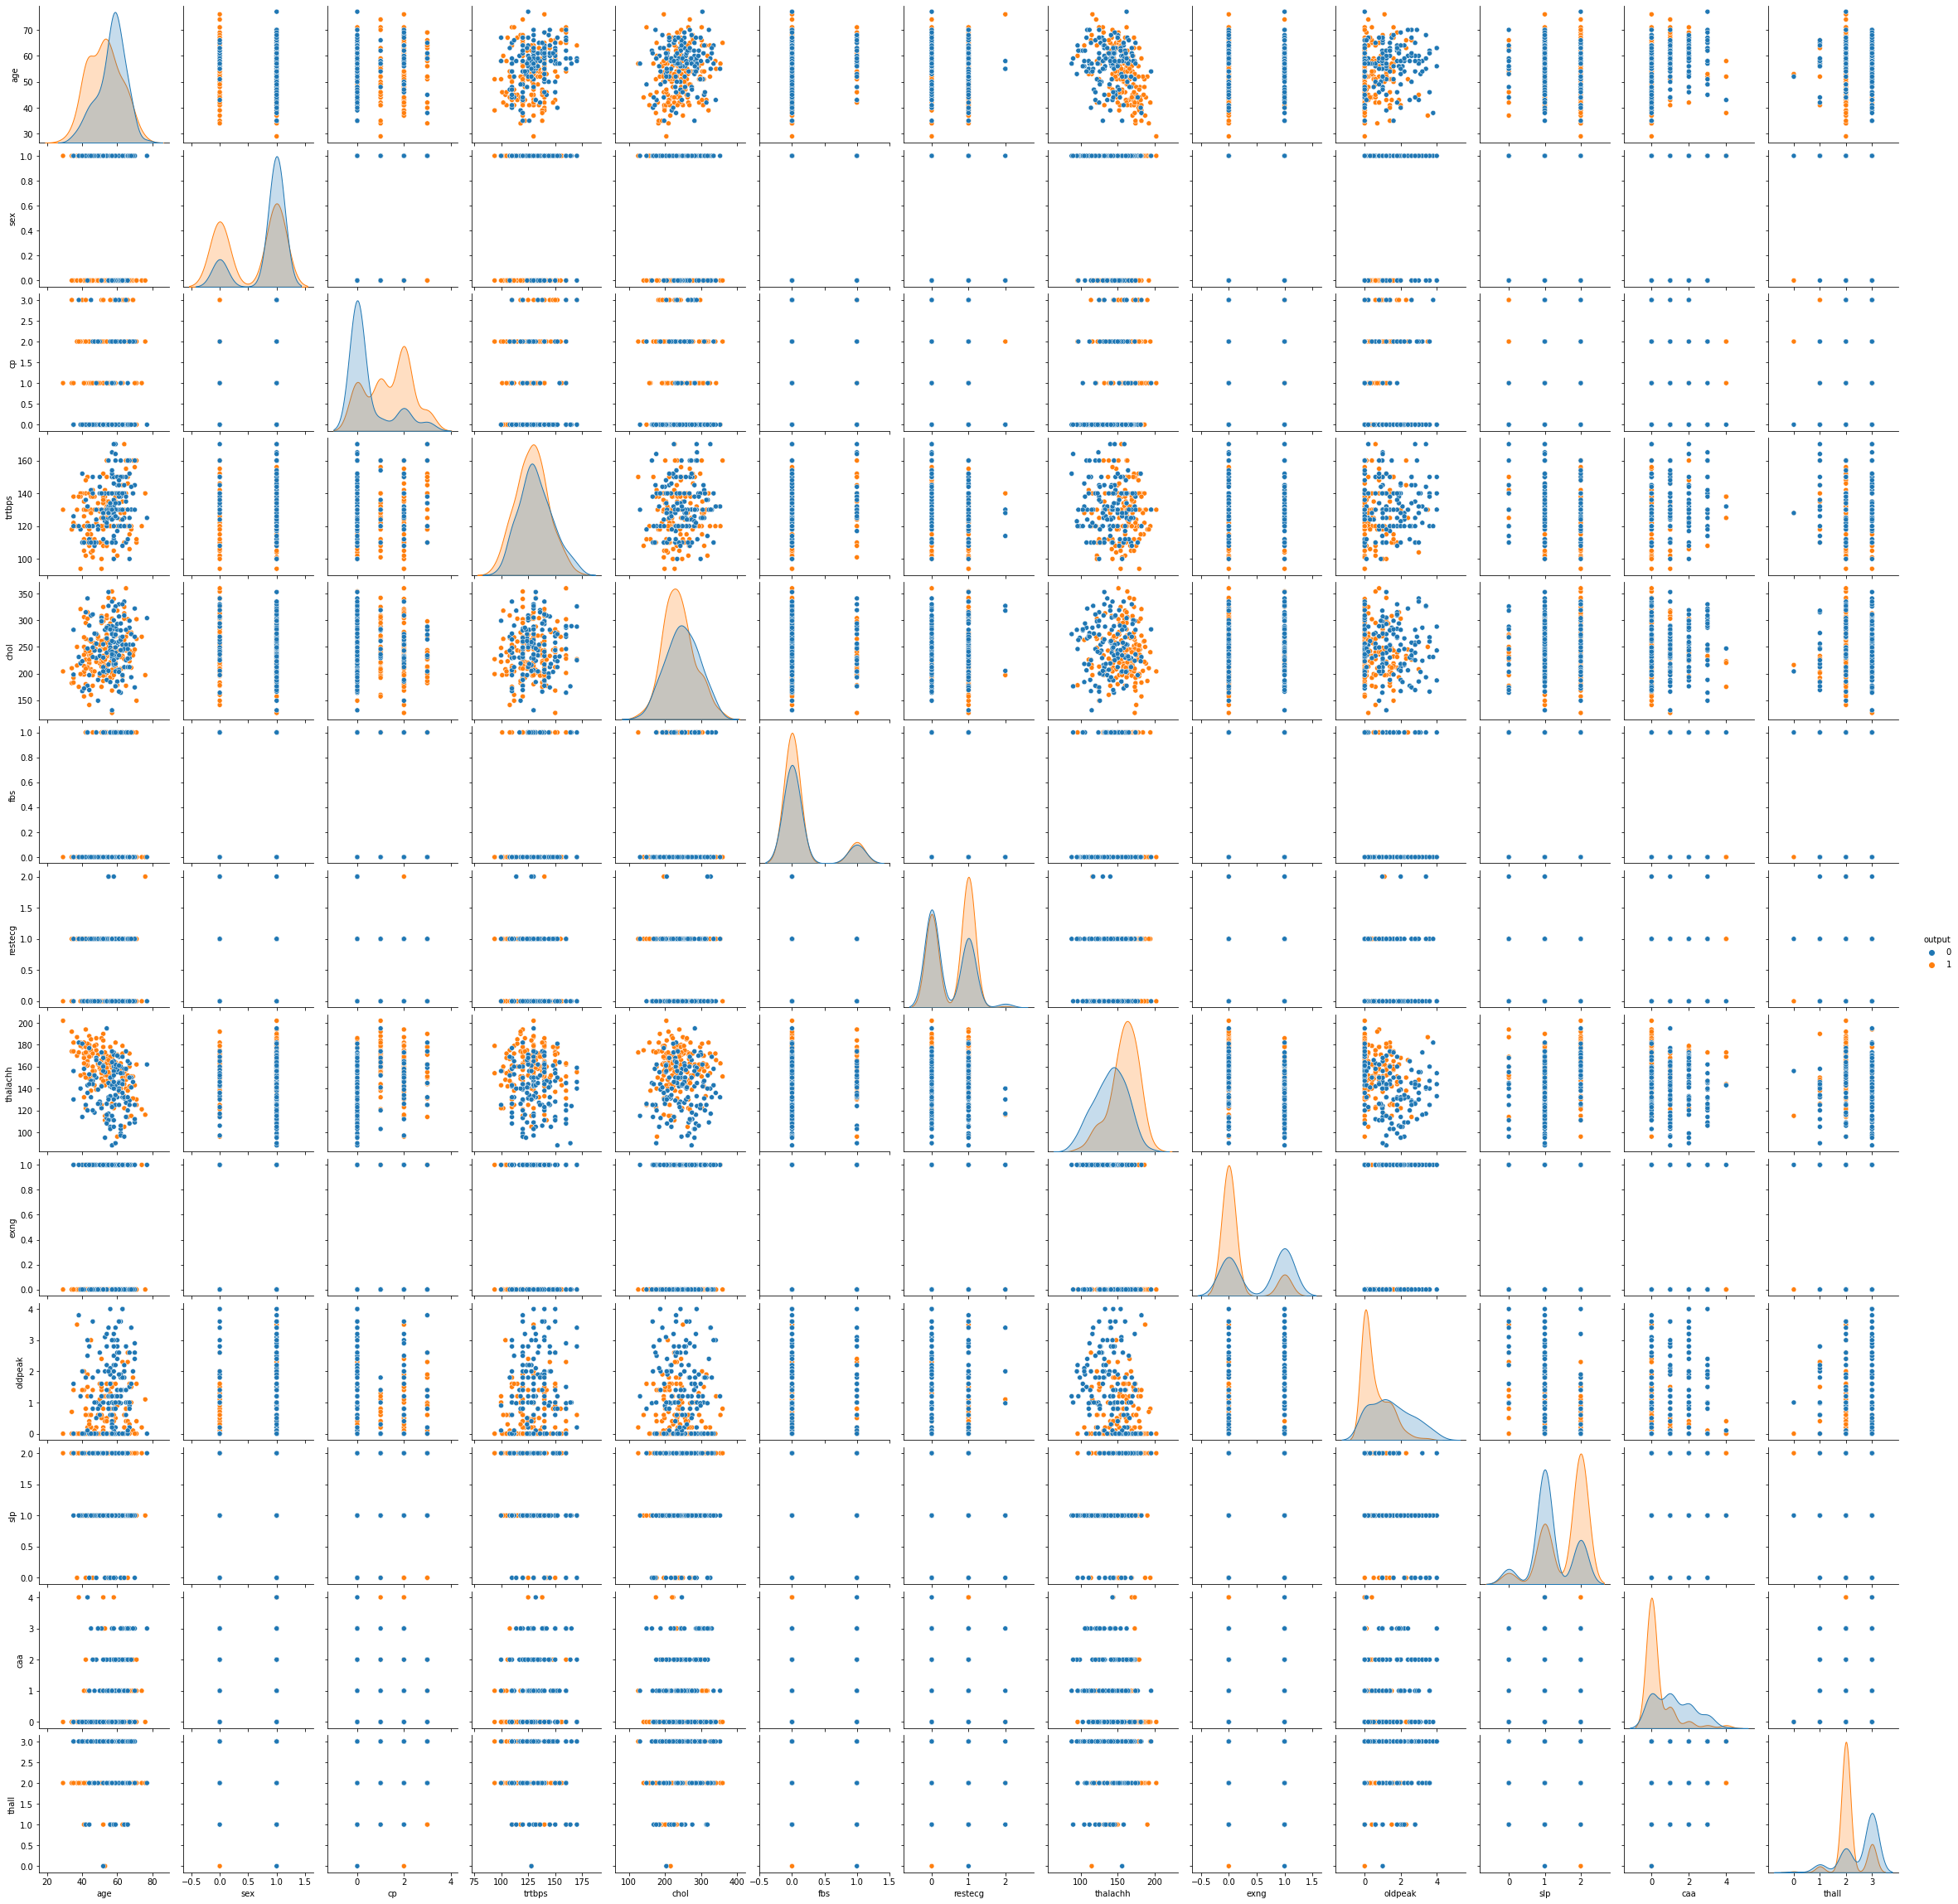

In [78]:
#Criação do gráfico de dispersão, (scatter) conhecido como pairplot (representações de dados de duas (tipicamente) ou mais variáveis organizadas em um gráfico.)
sns.pairplot(df_heart, hue='output')
plt.show()

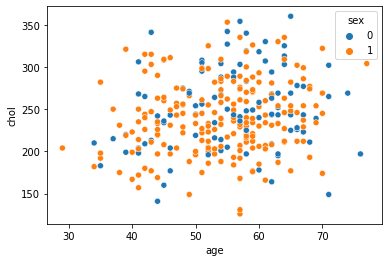

In [79]:
sns.scatterplot(data=df_heart, x='age', y='chol', hue='sex')

**Observação**:


- Podemos verificar que entre a variavel **chol** (***Colesterol***) e age tem uma fraca correlação positiva

- Níveis altos de colesterol entre as pessoas de **40** à **70** anos de idade.

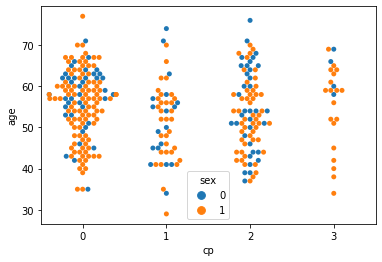

In [80]:
#Gráfico semelhante ao stripplot, apenas os pontos são ajustados para que não se sobreponham, pois ajuda a representar a melhor representação da distribuição de valores
sns.swarmplot(data=df_heart, x='cp', y='age', hue='sex')

**Observação**:


-  Verificando a variável **cp** que é o tipo de dor no peito, podemos ver que entre **33** à **70** anos, as pessoas do sexo: **1** (**Masculino**) e **0** (**Feminino**), tem uma **angina típica**. 

- Verificando a variável **cp**, podemos ver que as pessoas do **sexo masculino** entre **33** à **70** anos, podem **não ter tido dor no peito**.

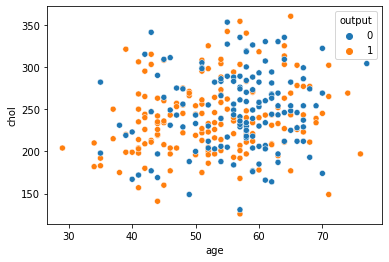

In [81]:
sns.scatterplot(data=df_heart, x='age', y='chol', hue='output')

**Observação**:

- Avaliando o **nível de colesterol** e a **idade**, as pessoas com mais chances de um ataque cardiado, foram as pessoas de **40** à **70** anos. 

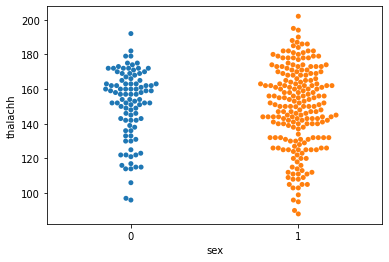

In [82]:
sns.swarmplot(data=df_heart, x='sex', y='thalachh')

**Groupby**, **Pivot_table**, **Crosstab**

**Groupby**
 - Criamos um agrupamento de categorias e aplicamos uma função às categorias.
 - Groupby se refere principalmente a um processo que envolve uma ou mais das seguintes etapas:
   - **Divisão**: é um processo no qual dividimos os dados em grupos, aplicando algumas condições nos conjuntos de dados.
   - **Aplicação**: É um processo no qual aplicamos uma função a cada grupo de forma independente
   - **Combinação**: é um processo no qual combinamos diferentes conjuntos de dados após aplicar agrupamento e resultados em uma estrutura de dados

In [83]:
df_heart.groupby(['sex']).mean()

,age,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
sex,,,,,,,,,,,,,
0,55.677083,1.041667,130.357722,251.149621,0.125000,0.572917,151.125000,0.229167,0.821644,1.427083,0.552083,2.125000,0.750000
1,53.834951,0.927184,129.933364,239.601942,0.160194,0.504854,149.227333,0.373786,1.050539,1.383495,0.796117,2.402913,0.446602


In [84]:
df_heart.shape

(302, 14)

In [85]:
df_heart.groupby(['sex','output']).mean()

age        cp      trtbps        chol       fbs   restecg  \
sex output                                                                    
0   0       59.041667  0.166667  137.303043  261.231061  0.250000  0.541667   
    1       54.555556  1.333333  128.042615  247.789141  0.083333  0.583333   
1   0       56.087719  0.543860  130.948566  246.061404  0.140351  0.429825   
    1       51.043478  1.402174  128.675397  231.597826  0.184783  0.597826   

              thalachh      exng   oldpeak       slp       caa     thall  
sex output                                                                
0   0       142.416667  0.583333  1.624074  0.958333  1.291667  2.500000  
    1       154.027778  0.111111  0.554167  1.583333  0.305556  2.000000  
1   0       139.095005  0.543860  1.432749  1.210526  1.140351  2.552632  
    1       161.782609  0.163043  0.576932  1.597826  0.369565  2.217391

**Observação**:

- O **colesterol** das pessoas do **sexo 0** (**Feminino**) indicam maiores possibilidades desta pessoa vir a sofrer um ataque cardíaco, segundo os dados desta analise percebe-se que o **sexo 0** (**Feminino**) possuí maiores chances de ter um ataque cardíaco que o **sexo 1** (**Masculino**)




**Pivot_table**
 - A função **pandas.pivot** (**índice**, **colunas**, **valores**) produz uma **tabela dinâmica** baseada em **3 colunas** do **DataFrame**. Usa valores **exclusivos de índices** / **colunas** e **preenche com valores**.

 - Os níveis na tabela dinâmica serão armazenados em **objetos MultiIndex** (**índices hierárquicos**) no **índice** e nas **colunas** do **DataFrame** de resultado.

In [86]:
#thalachh: Frequência cardíaca máxima atingida
#trtbps: pressão arterial em repouso
#cp : tipo de dor no peito
    #- Valor 0: angina típica
    #- Valor 1: angina atípica
    #- Valor 2: dor não anginosa
    #- Valor 3: assintomático
    
#rest_ecg : resultados eletrocardiográficos em repouso
    # Valor 0: normal
    # Valor 1: com anormalidade da onda ST-T (inversões da onda T e/ou elevação ou  depressão do segmento ST > 0,05 mV)
    # Valor 2: mostrando provável ou definitiva hipertrofia ventricular esquerda 

pd.pivot_table(df_heart,
               values=['chol','age','thalachh','trtbps'],
               index=['sex','cp','output','restecg'],
               aggfunc=['mean'])

mean                                    
                             age        chol    thalachh      trtbps
sex cp output restecg                                               
0   0  0      0        58.818182  262.958678  146.363636  144.642569
              1        60.375000  253.375000  142.250000  131.267065
              2        55.000000  266.000000  123.500000  129.034130
       1      0        51.777778  254.474747  147.333333  124.888889
              1        58.555556  245.777778  149.444444  124.452029
    1  0      0        57.500000  277.500000  163.000000  133.000000
       1      0        54.166667  256.500000  156.833333  131.166667
              1        49.500000  243.200000  166.400000  125.200000
    2  0      1        62.000000  263.000000   97.000000  130.000000
       1      0        57.600000  255.703030  151.200000  129.466667
              1        51.222222  241.500000  157.333333  125.777778
              2        76.000000  197.000000  116.000000  140.000000
    3  1      0        58.000000  283.000000  162.000000  150.000000
              1        65.000000  235.000000  145.333333  146.666667
1   0  0      0        56.160000  249.000000  133.700000  130.960000
              1        54.656250  239.125000  137.775955  129.093750
              2        58.000000  318.000000  140.000000  114.000000
       1      0        54.125000  247.250000  160.875000  130.125000
              1        52.538462  225.923077  153.000000  126.153846
    1  0      0        57.750000  270.000000  155.500000  131.017065
              1        57.000000  245.333333  143.000000  131.333333
       1      0        50.571429  235.714286  169.428571  133.142857
              1        48.722222  235.944444  164.055556  122.388889
    2  0      0        60.222222  223.666667  150.777778  131.340918
              1        56.125000  253.250000  142.000000  133.625000
       1      0        50.500000  244.083333  163.333333  131.083333
              1        49.863636  221.636364  163.590909  127.866739
    3  0      0        61.000000  281.000000  152.666667  156.000000
              1        50.750000  233.250000  155.250000  124.500000
       1      0        55.400000  219.300000  155.400000  134.406826
              1        46.000000  248.500000  178.000000  146.000000

**Observações**:

- Pessoas do **sexo 0** (**Feminino**) (***sex=0***), com **angina tipica** (***cp=0***), com maiores chances de ter um ataque cardíaco (***output=1***) e com **anormalidade** (***restecg=1***), tem em média **58 anos**, já a média da **frequência cardíaca máxima** (***thalachh***), foi **149**.

- Comparando o **sexo 0** (**Feminino**) com **sexo 1** (**Masculino**), utilizando as mesmas variáveis supracitadas, notamos algumas difereças, as pessoas do **sexo 0** (**Feminino**) tem uma média de idade de **58 anos**, já o **sexo 1** (**Masculino**) tem a média de **52 anos**, agora a média da **frequência cardíaca máxima** (***thalachh***) foi **149** para o **sexo 0** (**Feminino**) e 153 para o **sexo 1** (**Masculino**).


**Crosstab**
- Este método é usado para calcular uma **tabulação cruzada simples** de dois (ou mais) **fatores**. Por padrão, calcula uma **tabela de frequência dos fatores**, a menos que uma matriz de valores e uma função de agregação sejam passadas.

In [87]:
pd.crosstab([df_heart['sex'], df_heart['output']],
            df_heart['cp'],
            values = df_heart['thalachh'],
            aggfunc='mean')

cp                   0           1           2           3
sex output                                                
0   0       142.619048  163.000000   97.000000         NaN
    1       148.388889  162.812500  153.411765  149.500000
1   0       135.347356  150.142857  146.647059  154.142857
    1       156.000000  165.560000  163.500000  159.166667

**Observação**:

- Pessoas do **sexo 1** (**Masculino**) (**sex=1**), com maiores possibilidades de ter um ataque cardíaco (**output=1**), tiveram em média **156** com **angina típica** (**cp=0**), portanto tiveram algumas pessoas que não apresentaram sintomas (**cp=3**), e tiveram chances de ter um ataque cardíaco. 

**Teste de Shapiro-Wilk**
 - O teste de **Shapiro-Wilk** ou teste de **Shapiro** é um **teste de normalidade** nas estatísticas frequentistas. A hipótese nula do teste de Shapiro é que a população se distribui normalmente.

**Quantile-quantile plot**
- Quando os **quantis** de duas variáveis ​​são representados um contra o outro, o gráfico obtido é conhecido como quantil - **gráfico de quantil** ou **qqplot**. Este gráfico fornece um **resumo de se as distribuições de duas variáveis ​​são semelhantes** ou **não** em relação às localizações.

In [88]:
from statsmodels.graphics.gofplots import qqplot

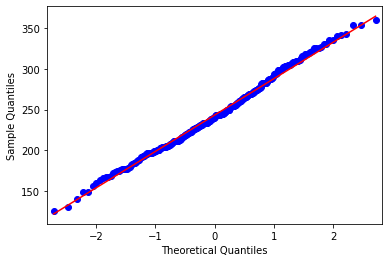

In [89]:
qqplot(df_heart['chol'], line = 's');

**Teste de Shapiro-Wilk**


- **p-value**: é usado para interpretar o teste estatístico
- **p <= alpha**: rejeita a hipótese, não é normal
- **p > alpha**: não rejeita a hipótese, é normal

In [90]:
from scipy.stats import shapiro   

In [91]:
_, p = shapiro(df_heart['oldpeak'])
p

7.233075858026935e-16

In [92]:
alpha = 0.05
if p > alpha:
  print('Distribuição normal')
else:
  print('Distribuição não normal')

Distribuição não normal


## **Data preprocessing - Pré-processamento de dados**

Referência: [Vinicius Bôscoa](https://www.viniboscoa.dev/blog/codificacao-de-variaveis-label-vs-one-hot-encoder)

**Label Encoding**
- from sklearn.preprocessing import LabelEncoder

**One Hot Encoding**

- **OneHotEncoder()** vs **pandas.get_dummies**:

Referência: [Albert Um - Medium](https://https://albertum.medium.com/preprocessing-onehotencoder-vs-pandas-get-dummies-3de1f3d77dcc)

- **from** sklearn.preprocessing **import** OneHotEncoder

- Utilizando o pandas: **pd.get_dummies()**




In [93]:
df_heart.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145.0,233.0,1,0,150.0,0,2.3,0,0,1,1
1,37,1,2,130.0,250.0,0,1,187.0,0,3.5,0,0,2,1
2,41,0,1,130.0,204.0,0,0,172.0,0,1.4,2,0,2,1
3,56,1,1,120.0,236.0,0,1,178.0,0,0.8,2,0,2,1
4,57,0,0,120.0,354.0,0,1,163.0,1,0.6,2,0,2,1


**Label Encoding**
- Resumindo o **Label Encoder** é uma excelente ferramenta para converter variáveis categóricas que **possuem alguma relação de ordem**, no entanto não é indicado para **variáveis que não possuem tal relação** devido a possibilidade de introduzir problemas no modelo.

In [94]:
#Utilizando o label enconder, será usado com algoritmos baseados em árvore
df_tree = df_heart.apply(LabelEncoder().fit_transform)

In [95]:
df_tree

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,29,1,3,32,64,1,0,49,0,23,0,0,1,1
1,3,1,2,22,81,0,1,84,0,33,0,0,2,1
2,7,0,1,22,35,0,0,71,0,15,2,0,2,1
3,22,1,1,14,67,0,1,76,0,8,2,0,2,1
4,23,0,0,14,146,0,1,62,1,6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,23,0,0,29,71,0,1,22,1,2,1,0,3,0
299,11,1,3,8,94,0,1,31,0,13,1,0,3,0
300,34,1,0,31,26,1,1,39,0,32,1,2,3,0
301,23,1,0,22,1,0,1,15,1,13,1,1,3,0


In [96]:
#Removendo o output
df_tree_ML = df_tree.drop("output", axis=1)

Podemos usar isso diretamente em muitos modelos baseados em árvore:

- **Decision trees**
  -  Uma árvore de decisão é um fluxograma semelhante a uma estrutura de árvore, em que cada nó interno denota um teste em um atributo, cada **ramificação** representa um resultado do teste e cada nó folha (**nó terminal**) contém um rótulo de classe. 
- **Random forest**
  - Algoritmo onde o classificador de **floresta aleatória** cria um conjunto de árvores de decisão a partir de um subconjunto selecionado aleatoriamente do conjunto de treinamento.
- **Extra Trees**
  - Escolhe as **variáveis** e **amostras randomicamente**, e também o **threshold** para **spilt dos dados** de maneira randômica.
- Ou qualquer tipo de modelo de árvores impulsionadas
  - **XGBoost**
  - **GBM**
  - **LightGBM**

**One Hot Encoding**
- É uma transformação que fazemos nos dados para representarmos uma **variável categórica** de forma **binária** (**indica presença ou ausência de um valor**).

Utilizando o pandas: pd.get_dummies()

In [97]:
#Classificação das Variáveis

#Quantitativos ou numéricos,
# esses são valores discretos:
#sex, cp, fbs, restecg, exng, slp, caa, thall

#Contínuas:
#age, trtbps, chol, thalachh, oldpeak

colunas_cat = ['sex', 'cp', 'fbs', 'restecg', 'exng', 'slp', 'caa', 'thall']
colunas_cont = ['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']

df_nontree = pd.get_dummies(df_heart, columns=colunas_cat)

In [98]:
df_nontree

,age,trtbps,chol,thalachh,oldpeak,output,sex_0,sex_1,cp_0,cp_1,...,slp_2,caa_0,caa_1,caa_2,caa_3,caa_4,thall_0,thall_1,thall_2,thall_3
0,63,145.0,233.0,150.0,2.3,1,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
1,37,130.0,250.0,187.0,3.5,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
2,41,130.0,204.0,172.0,1.4,1,1,0,0,1,...,1,1,0,0,0,0,0,0,1,0
3,56,120.0,236.0,178.0,0.8,1,0,1,0,1,...,1,1,0,0,0,0,0,0,1,0
4,57,120.0,354.0,163.0,0.6,1,1,0,1,0,...,1,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,140.0,241.0,123.0,0.2,0,1,0,1,0,...,0,1,0,0,0,0,0,0,0,1
299,45,110.0,264.0,132.0,1.2,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,1
300,68,144.0,193.0,141.0,3.4,0,0,1,1,0,...,0,0,0,1,0,0,0,0,0,1
301,57,130.0,131.0,115.0,1.2,0,0,1,1,0,...,0,0,1,0,0,0,0,0,0,1


In [99]:
#Identificar se tm valores categoricos, podendo utilizar label encoder ou hot enconder
#Vai ser preciso balancear os dados ? ex coluna sex e output. colab com alguns exemplos https://colab.research.google.com/drive/1hXvnWImcBThKlzBmyZgnzxcwbOuDWmlK?authuser=1#scrollTo=jBkaWuUyvwRC
#Padronizar ou normalizar os dados -> https://colab.research.google.com/drive/1iRdnXDNFWaBy4F8kZw3KZGQPRjf7HnN9?authuser=1
#https://colab.research.google.com/drive/1iRdnXDNFWaBy4F8kZw3KZGQPRjf7HnN9?authuser=1#scrollTo=l-LtX03IyNVg


**Normalização**


**Normalizar os dados usando Min-Max**

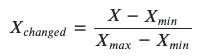

- Os atributos geralmente são normalizados para ficarem em um intervalo fixo - geralmente de **0** a **1** - **dividindo** todos os valores pelo **valor máximo** encontrado ou subtraindo o **valor mínimo** e **dividindo pelo intervalo** entre os **valores máximo** e **mínimo**.

* Para normalizar os dados, usamos a biblioteca **MinMaxScaler**.

In [100]:
from sklearn.preprocessing import MinMaxScaler


#Pegando todas as variaveis menos a variavel output
X_norm = df_nontree.drop("output", axis=1)
#Pegando a variavel output
y = df_nontree["output"]
#X = X.reshape(-1,1)

#Instanciando o MinMaxScaler
scaler = MinMaxScaler()

X_norm[colunas_cont] = scaler.fit_transform(X_norm[colunas_cont])

#é possível reverter a normalização MinMax seguindo o passo a passo a seguir
#scaler.inverse_transform(X_norm[colunas_cont])



In [101]:
#Mostrando o dataframe com os valores normalizados entre 0 e 1 
X_norm.head()

,age,trtbps,chol,thalachh,oldpeak,sex_0,sex_1,cp_0,cp_1,cp_2,...,slp_2,caa_0,caa_1,caa_2,caa_3,caa_4,thall_0,thall_1,thall_2,thall_3
0,0.708333,0.671053,0.457265,0.543860,0.575,0,1,0,0,0,...,0,1,0,0,0,0,0,1,0,0
1,0.166667,0.473684,0.529915,0.868421,0.875,0,1,0,0,1,...,0,1,0,0,0,0,0,0,1,0
2,0.250000,0.473684,0.333333,0.736842,0.350,1,0,0,1,0,...,1,1,0,0,0,0,0,0,1,0
3,0.562500,0.342105,0.470085,0.789474,0.200,0,1,0,1,0,...,1,1,0,0,0,0,0,0,1,0
4,0.583333,0.342105,0.974359,0.657895,0.150,1,0,1,0,0,...,1,1,0,0,0,0,0,0,1,0


In [102]:
X_norm.chol.min(), X_norm.chol.max()

(0.0, 1.0)

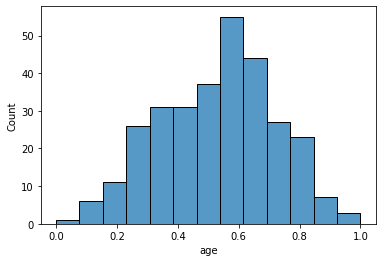

In [103]:
sns.histplot(X_norm.age)

**Padronização**

A padronização tem a mesma ideia da **normalização**, isto é, colocar os dados em uma **mesma escala**. Porém, na padronização, colocamos a **média dos dados** em **0** e o **desvio padrão** em **1**. Esse algoritmo é melhor utilizado quando a nossa distribuição é **Gaussiana**.

**Padronizar** os dados normalmente é feita usando a fórmula z-score


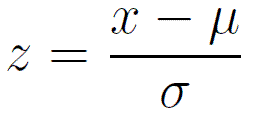

In [104]:
from sklearn.preprocessing import StandardScaler


#Pegando todas as variaveis menos a variavel output
X_padro = df_nontree.drop("output", axis=1)

#Pegando todas as colunas
todas_colunas = X_padro.columns

#Instanciando o StandardScaler
scaler_standard = StandardScaler()

#dataset padronizado
X_padro[todas_colunas] = scaler_standard.fit_transform(X_padro[todas_colunas])

In [105]:
X_padro.head()

,age,trtbps,chol,thalachh,oldpeak,sex_0,sex_1,cp_0,cp_1,cp_2,...,slp_2,caa_0,caa_1,caa_2,caa_3,caa_4,thall_0,thall_1,thall_2,thall_3
0,0.949794,0.987327,-0.230602,0.007560,1.272205,-0.682656,0.682656,-0.948352,-0.445435,-0.630990,...,-0.935829,0.851889,-0.5237,-0.379393,-0.266312,-0.115857,-0.08165,3.972125,-1.097442,-0.795256
1,-1.928548,-0.004513,0.151013,1.658415,2.426811,-0.682656,0.682656,-0.948352,-0.445435,1.584812,...,-0.935829,0.851889,-0.5237,-0.379393,-0.266312,-0.115857,-0.08165,-0.251754,0.911210,-0.795256
2,-1.485726,-0.004513,-0.881592,0.989149,0.406250,1.464866,-1.464866,-0.948352,2.244994,-0.630990,...,1.068571,0.851889,-0.5237,-0.379393,-0.266312,-0.115857,-0.08165,-0.251754,0.911210,-0.795256
3,0.174856,-0.665740,-0.163258,1.256856,-0.171053,-0.682656,0.682656,-0.948352,2.244994,-0.630990,...,1.068571,0.851889,-0.5237,-0.379393,-0.266312,-0.115857,-0.08165,-0.251754,0.911210,-0.795256
4,0.285561,-0.665740,2.485600,0.587590,-0.363487,1.464866,-1.464866,1.054461,-0.445435,-0.630990,...,1.068571,0.851889,-0.5237,-0.379393,-0.266312,-0.115857,-0.08165,-0.251754,0.911210,-0.795256


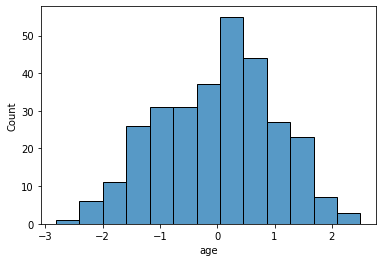

In [106]:
sns.histplot(X_padro.age)

**Train and test split**

In [107]:
# Train Test Split
from sklearn.model_selection import train_test_split


#Treino e teste para valores normalizados
X_train_norm, X_test_norm, y_train_norm, y_test_norm = train_test_split(X_norm, y, test_size= 0.2, random_state = 0)

#Treino e teste para valores padronizados
X_train_padro, X_test_padro, y_train_padro, y_test_padro = train_test_split(X_padro, y, test_size= 0.2, random_state = 3)

#Treino e teste sem normalizar
X_train, X_test, y_train, y_test = train_test_split(df_tree_ML, y, test_size= 0.2, random_state = 0)

In [108]:
X_train_norm.shape, X_test_norm.shape

((241, 30), (61, 30))

In [109]:
X_train_padro.shape, X_test_padro.shape

((241, 30), (61, 30))

In [110]:
X_train.shape, X_test.shape

((241, 13), (61, 13))

# **Modeling - Modelagem**
* Referência: [Escola.DNC](https://www.escoladnc.com.br/blog/data-science/metodologia-crisp-dm/)

## Logistic Regression

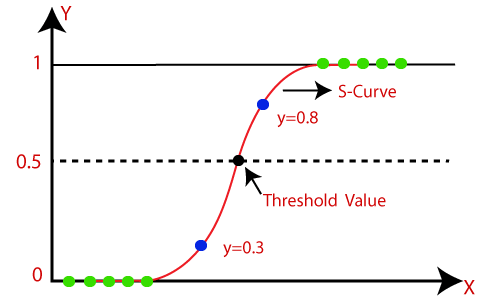

Em uma **regressão linear**, traçarmos uma **reta** que tente a alcançar a maior parte dos pontos enquanto na **regressão logística**, será trassado uma curva em **S**.

Na regressão logística será uma variável categorica podendo assumir um conjunto de dados limitados de possibilidades([sim, não], [1,0],[ótimo, regular, ruim]).


**Conteúdos bons para estudar regressão logística**:

- Referência: [Storopoli - Aula_12_Regressao_Logistica](https://colab.research.google.com/github/storopoli/ciencia-de-dados/blob/main/notebooks/Aula_12_Regressao_Logistica.ipynb#scrollTo=yD2AGvXt-fWT)

- Referência: [Matheus Remigio - Medium](https://medium.com/@msremigio/regress%C3%A3o-log%C3%ADstica-logistic-regression-997c6259ff9a)

In [111]:
# Instanciando o objeto LogisticRegression()
reglog = LogisticRegression(C = 0.1, solver = 'liblinear')

# Treinando o modelo
reglog.fit(X_train_padro, y_train_padro)

#Gerando predições do modelo
y_pred = reglog.predict(X_test_padro)

# calculando as probabilidades
y_pred_proba = reglog.predict_proba(X_test_padro)

#accuracy
#accuracy_score(y_test_padro, y_pred)

**predict_proba** 
- Retorna estimativas para todas as classes, ordenadas pelo rótulo das classes. Assim, a primeira coluna é a probabilidade da **classe 1**, **P(Y=1|X)**, e a segunda coluna é a probabilidade da **classe 0**, **P(Y=0|X)**.

In [112]:
y_pred_proba[0:5]

array([[0.24030976, 0.75969024],
       [0.04097373, 0.95902627],
       [0.26649102, 0.73350898],
       [0.16095612, 0.83904388],
       [0.02702414, 0.97297586]])

**Log Loss** 
- É a métrica de classificação **mais importante** baseada em **probabilidades**. É difícil interpretar os valores brutos de perda de log, mas a perda de log ainda é uma boa métrica para comparar modelos. Para qualquer problema, **um valor menor de perda de log significa melhores previsões.**


$$Log~Loss = \frac{1}{m} \sum_{i=1}^{m} - \big[y^{(i)} \log (\hat{p}^{(i)}) + (1-y^{(i)}) \log (1-\hat{p}^{(i)}) \big]$$



**Explicações com detalhes sobre log loss:**

- Referência: [Analytics Vidhya](https://www.analyticsvidhya.com/blog/2020/11/binary-cross-entropy-aka-log-loss-the-cost-function-used-in-logistic-regression/)

- Referência: [Storopoli - Aula_12_Regressao_Logistica](https://colab.research.google.com/github/storopoli/ciencia-de-dados/blob/main/notebooks/Aula_12_Regressao_Logistica.ipynb#scrollTo=yD2AGvXt-fWT)

- Referência: [Vidhya - Medium](https://medium.com/analytics-vidhya/understanding-the-loss-function-of-logistic-regression-ac1eec2838ce)

In [113]:
#Log loss
print('Log Loss do nosso modelo é {}'.format(log_loss(y_test_padro, y_pred).round(2)))

Log Loss do nosso modelo é 1.7


In [114]:
# imprimir relatório de classificação
print("Relatório de Classificação:\n", classification_report(y_test_padro,y_pred, digits=4))

Relatório de Classificação:
               precision    recall  f1-score   support

           0     0.9545    0.9130    0.9333        23
           1     0.9487    0.9737    0.9610        38

    accuracy                         0.9508        61
   macro avg     0.9516    0.9434    0.9472        61
weighted avg     0.9509    0.9508    0.9506        61



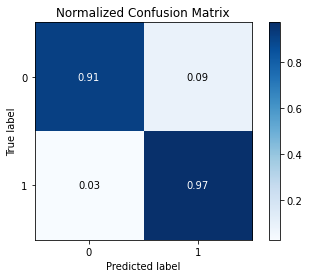

In [115]:
# plotar a matriz de confusão
skplt.metrics.plot_confusion_matrix(y_test_padro, y_pred, normalize=True)

## **Support Vector Machines**

**SVM** é uma técnica de **aprendizado supervisionado** que encontra um **hiperplano de separação entre os dados**. Esta separação busca minimizar uma função custo maximizando a distância entre os pontos, assim separando-os de maneira mais eficiente. O hiperplano de separação pode ser linear ou não dependendo do kernel.

- Conteúdos bons para estudar **Support Vector Machines**:
  - Referência: [Storopoli - Aula_13_Support_Vector_Machines](https://colab.research.google.com/github/storopoli/ciencia-de-dados/blob/main/notebooks/Aula_13_Support_Vector_Machines.ipynb#scrollTo=IdbyOyEW6fno)

  - Referência: [Geeks for Geeks](https://www.geeksforgeeks.org/classifying-data-using-support-vector-machinessvms-in-python/)

  - Referência: [Towards Data Science](https://towardsdatascience.com/support-vector-machine-python-example-d67d9b63f1c8)

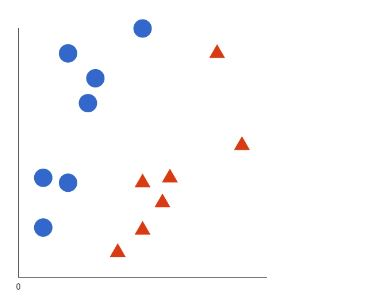


O algoritmo selecionará uma linha que não apenas separa as duas classes, mas fica o mais longe possível das amostras mais próximas. 


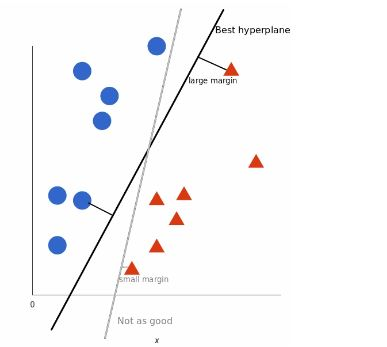

**3 tipos de Kernels**

* **Linear**
  - O **kernel linear** é mais preferido para problemas de **classificação de texto**, pois funciona bem para **grandes conjuntos de dados**. Usado quando os dados são linearmente separáveis

* **Rbf**
  - O **kernel Rbf** também é um tipo de **kernel gaussiano** que projeta os dados de **alta dimensão** e, em seguida, procura uma separação linear para eles.

* **Polinomial**
 - **Kernels polinomiais** dão bons resultados para problemas onde todos os dados de treinamento **são normalizados**.

In [116]:
# Instanciando o objeto SVC()
#kernel como rbf e  passando um hiperparâmetro C=1 quanto menor melhor
model_svc = SVC(C=1, random_state=0)

# Treinando o modelo
model_svc.fit(X_train_padro, y_train_padro)

#Gerando predições do modelo
y_pred = model_svc.predict(X_test_padro)

#accuracy
accuracy_score(y_test_padro, y_pred)

0.8852459016393442

In [117]:
# imprimir relatório de classificação
print("Relatório de Classificação:\n", classification_report(y_test_norm, y_pred, digits=4))

Relatório de Classificação:
               precision    recall  f1-score   support

           0     0.3636    0.2963    0.3265        27
           1     0.5128    0.5882    0.5479        34

    accuracy                         0.4590        61
   macro avg     0.4382    0.4423    0.4372        61
weighted avg     0.4468    0.4590    0.4499        61



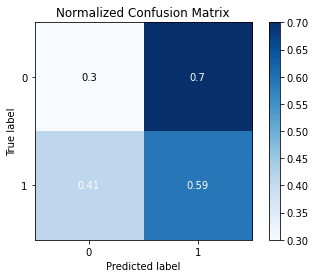

In [118]:
# plotar a matrix de confusão
skplt.metrics.plot_confusion_matrix(y_test_norm, y_pred, normalize=True)

**Ajuste de hiperparâmetro SVM usando GridSearchCV**

- **GridSearchCV** usa um dicionário que descreve os parâmetros que podem ser tentados em um modelo para treiná-lo. A grade de parâmetros é definida como um dicionário, onde as chaves são os parâmetros e os valores são as configurações para ser testado.

- Referência: [Geeks for Geeks](https://www.geeksforgeeks.org/svm-hyperparameter-tuning-using-gridsearchcv-ml/)

In [119]:
# definindo os parametros
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['linear', 'poly', 'rbf']} 
  
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
  
# treinando o modelo grid_search
grid.fit(X_train_padro, y_train_padro)

Fitting 5 folds for each of 75 candidates, totalling 375 fits
[CV 1/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.796 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.917 total time=   0.0s
[CV 3/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.833 total time=   0.0s
[CV 4/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.812 total time=   0.0s
[CV 5/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.708 total time=   0.0s
[CV 1/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.755 total time=   0.0s
[CV 2/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.833 total time=   0.0s
[CV 3/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.729 total time=   0.0s
[CV 4/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.833 total time=   0.0s
[CV 5/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.667 total time=   0.0s
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.531 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['linear', 'poly', 'rbf']},
             verbose=3)

In [120]:
# print com os melhores parametros
print(grid.best_params_)

print(grid.best_estimator_)

{'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}
SVC(C=100, gamma=0.0001)


In [121]:
grid_predictions = grid.predict(X_test_padro)
  
# print classification report
print(classification_report(y_test_padro, grid_predictions))

              precision    recall  f1-score   support

           0       0.90      0.83      0.86        23
           1       0.90      0.95      0.92        38

    accuracy                           0.90        61
   macro avg       0.90      0.89      0.89        61
weighted avg       0.90      0.90      0.90        61



## **k-Nearest Neighbor**(***kNN***) 


**k-Nearest Neighbors (kNN)** é um modelo que classifica os pontos de dados com base nos pontos que são mais semelhantes a ele. Ele usa dados de teste para fazer uma “**suposição educada**” sobre como um ponto não classificado deve ser classificado.


Temos duas classes já classificadas, a **classe azul** e a **classe vermelha**, tem um ponto no meio que é aonde queremos fazer a classificação (**um VALOR não classificado**), podemos calcular a distância do dado não classificado, com todos os outros para saber quais estão mais próximos, quanto menor a distancia, mais proximo esta do ponto. Devemos escolher o valor de **K**, que é quantos vizinhos mais proximos devemos considerar.

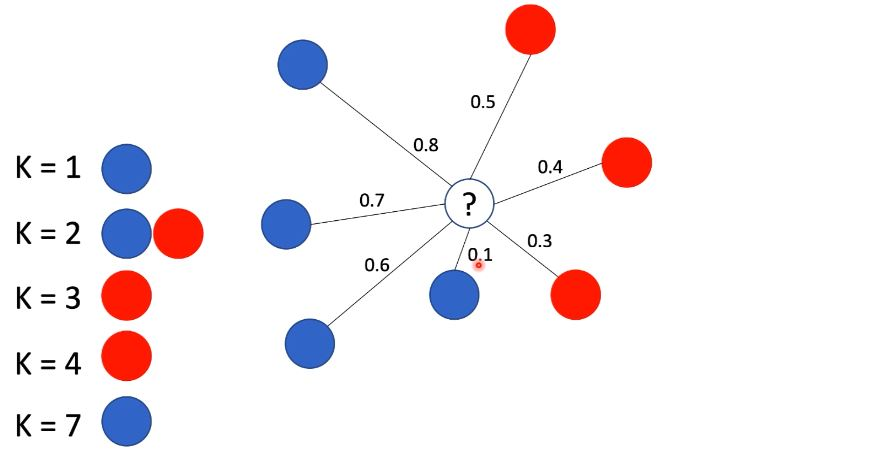

- Vamos calcular a Distância euclidiana para os pontos:
  - x = 6,5,3
  - y = 3,2,1

- Formula

>de.JPG











In [122]:
p_x = np.array((6,5,3))
p_y = np.array((3,2,1))

#Subtração de cada posição do vetor
sub = p_x - p_y
#Elevação ao quadrado
ele = sub ** 2
#Somatório
sum = np.sum(ele)
#Raiz quadrada
raiz = np.sqrt(sum)
#Distância Euclidiana
raiz

#A distância entre esses dois pontos é 4.69, quanto maior o valor mais longe os pontos estão, quanto menor mais proximos estão.

4.69041575982343

In [123]:
# Instanciando o objeto KNeighborsClassifier(n_neighbors = k)
modelKNN = KNeighborsClassifier(n_neighbors = 40)

# Treinando o modelo
modelKNN.fit(X_train_norm, y_train_norm)

#Gerando predições do modelo
y_pred = modelKNN.predict(X_test_norm)

#accuracy
accuracy_score(y_test_norm, y_pred)

0.8852459016393442

In [124]:
# print classification report
print(classification_report(y_test_norm, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.89      0.87        27
           1       0.91      0.88      0.90        34

    accuracy                           0.89        61
   macro avg       0.88      0.89      0.88        61
weighted avg       0.89      0.89      0.89        61



## **Random Forest**

Uma Floresta Aleatória é um algoritmo que constrói uma infinidade de Árvores de Decisão aleatórias e usa a previsão das árvores individuais para computar uma previsão geral do conjunto de árvores.

Pode ser usado tanto para classificação quanto para regressão. É também o algoritmo mais flexível e fácil de usar. Uma floresta é composta de árvores. Diz-se que quanto mais árvores tem, mais robusta é a floresta. Florestas aleatórias criam árvores de decisão em amostras de dados selecionadas aleatoriamente, obtêm previsões de cada árvore e selecionam a melhor solução por meio de votação. Ele também fornece um bom indicador da importância do recurso.


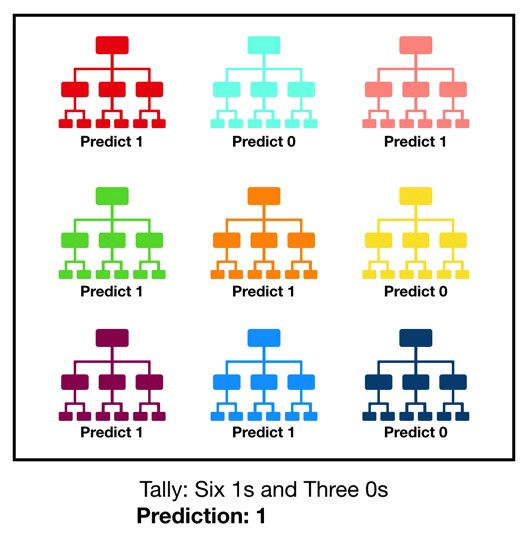

Esse é um dos algoritmos que não precisam dos dados na mesma escala, porém é bom fazer os testes com os valores normalizados ou padronizados

In [125]:
rf = RandomForestClassifier(criterion='entropy',
                            random_state=19,
                            n_estimators=50,
                            bootstrap=True,
                            max_depth= 3,
                            max_features =  0.1
                            )

rf.fit(X_train, y_train)

y_pred_1 = rf.predict(X_test)

#accuracy
accuracy_score(y_test, y_pred_1)

0.9016393442622951

In [126]:
# print classification report
print(classification_report(y_test, y_pred_1))

              precision    recall  f1-score   support

           0       0.89      0.89      0.89        27
           1       0.91      0.91      0.91        34

    accuracy                           0.90        61
   macro avg       0.90      0.90      0.90        61
weighted avg       0.90      0.90      0.90        61



**GridSearchCV** 
- É uma técnica para pesquisar os melhores valores de parâmetros de um determinado conjunto de **parâmetros da grade**. É basicamente um método de **validação cruzada**. O modelo e os parâmetros devem ser alimentados. Os melhores valores de parâmetro são extraídos e, em seguida, as previsões são feitas.  

In [127]:
param_grid = {
            "criterion": ['entropy', 'gini'],
            "n_estimators": [25, 50, 75],
            "bootstrap": [False, True],
            "max_depth": [3, 5, 10],
            "max_features": ['auto', 0.1, 0.2, 0.3]
}
grid_search = GridSearchCV(RandomForestClassifier(), param_grid, scoring="accuracy")
grid_search.fit(X_train, y_train)

classifier_rf = grid_search.best_estimator_ 

grid_search.best_params_, grid_search.best_score_

({'bootstrap': False,
  'criterion': 'entropy',
  'max_depth': 3,
  'max_features': 0.2,
  'n_estimators': 25},
 0.8468537414965986)

## **Encontrando os melhores valores para o train_test_split**


Foi feito um laço de repetição **for** para alimentar o **random_state** com diversos números de **0** até **39**, para pegar o **melhor conjunto de dados** tanto treino quanto de teste. Aproveitamos para realizar alguns testes, com valores padronizados e normalizados, buscando melhorar nossos algoritmos utilizados anteriormente.

In [128]:
#Valores normalizados
resultados_RL_norm = []
resultados_SVC_norm = []
resultados_RF_norm = []
resultados_KNN_norm = []

#Valores padronizados
resultados_RL_padro = []
resultados_SVC_padro = []
resultados_RF_padro = []
resultados_KNN_padro = []

#Valores sem transformações
resultados_RL = []
resultados_SVC = []
resultados_RF = []
resultados_KNN = []

Vamos passar diversos números para o parâmetro **random_state** e treinar os modelos com o dataframe **normalizado**

In [129]:
#Com valores normalizados
for i in range(40):

  #Treino e teste para valores normalizados
  X_train_norm, X_test_norm, y_train_norm, y_test_norm = train_test_split(X_norm, y, test_size= 0.2, random_state = i)

  #Regressão logística
  rl_model_norm = LogisticRegression(C = 0.1, solver = 'liblinear')
  rl_model_norm.fit(X_train_norm, y_train_norm)
  resultados_RL_norm.append(accuracy_score(y_test_norm, rl_model_norm.predict(X_test_norm)))

  #Support vector machine
  svc_model_norm = SVC(kernel='linear', C=1, random_state=0)
  svc_model_norm.fit(X_train_norm, y_train_norm)
  resultados_SVC_norm.append(accuracy_score(y_test_norm, svc_model_norm.predict(X_test_norm)))

  #KNN
  knn_model_norm = KNeighborsClassifier(n_neighbors = 40)
  knn_model_norm.fit(X_train_norm, y_train_norm)
  resultados_KNN_norm.append(accuracy_score(y_test_norm, knn_model_norm.predict(X_test_norm)))

  #Random Forest
  #Random Forest não precisa ficar na mesma escala, porém vamos testar :)
  rf_model_norm = RandomForestClassifier(criterion='entropy',
                            random_state=19,
                            n_estimators=50,
                            bootstrap=True,
                            max_depth= 3,
                            max_features =  0.1
                            )
  rf_model_norm.fit(X_train_norm, y_train_norm)
  resultados_RF_norm.append(accuracy_score(y_test_norm, rf_model_norm.predict(X_test_norm)))

Dataframe **Padronizado**

In [130]:
#Com valores padronizados
for i in range(40): 

  #Treino e teste para valores padronizados
  X_train_padro, X_test_padro, y_train_padro, y_test_padro = train_test_split(X_padro, y, test_size= 0.2, random_state = i)

  #Regressão logística
  rl_model_padro = LogisticRegression(C = 0.1, solver = 'liblinear')
  rl_model_padro.fit(X_train_padro, y_train_padro)
  resultados_RL_padro.append(accuracy_score(y_test_padro, rl_model_padro.predict(X_test_padro)))

  #Support vector machine
  svc_model_padro = SVC(kernel='linear', C=1, random_state=0)
  svc_model_padro.fit(X_train_padro, y_train_padro)
  resultados_SVC_padro.append(accuracy_score(y_test_padro, svc_model_padro.predict(X_test_padro)))

  #KNN
  knn_model_padro = KNeighborsClassifier(n_neighbors = 40)
  knn_model_padro.fit(X_train_padro, y_train_padro)
  resultados_KNN_padro.append(accuracy_score(y_test_padro, knn_model_padro.predict(X_test_padro)))

  #Random Forest
  rf_model_padro = RandomForestClassifier(criterion='entropy',
                            random_state=19,
                            n_estimators=50,
                            bootstrap=True,
                            max_depth= 3,
                            max_features =  0.1
                            )
  rf_model_padro.fit(X_train_padro, y_train_padro)
  resultados_RF_padro.append(accuracy_score(y_test_padro, rf_model_padro.predict(X_test_padro)))

Dataframe **sem alterações**

In [131]:
for i in range(40): 

  #Treino e teste sem alterações
  X_train, X_test, y_train, y_test = train_test_split(df_tree_ML, y, test_size= 0.2, random_state = i)


  #Regressão logística
  #Esse é um algoritmo que precisa dos dados na mesma escala
  rl_model = LogisticRegression(C = 0.1, solver = 'liblinear')
  rl_model.fit(X_train, y_train)
  resultados_RL.append(accuracy_score(y_test, rl_model.predict(X_test)))

  #Support vector machine
  #Esse é um algoritmo que precisa dos dados na mesma escala
  svc_model = SVC(kernel='linear', C=1, random_state=0)
  svc_model.fit(X_train, y_train)
  resultados_SVC.append(accuracy_score(y_test, svc_model.predict(X_test)))

  #KNN
  #Esse é um algoritmo que precisa dos dados na mesma escala
  knn_model = KNeighborsClassifier(n_neighbors = 40)
  knn_model.fit(X_train, y_train)
  resultados_KNN.append(accuracy_score(y_test, knn_model.predict(X_test)))

  #Random Forest
  #Esse é um algoritmo que NÃO precisa dos dados na mesma escala
  rf_model = RandomForestClassifier(criterion='entropy',
                            random_state=19,
                            n_estimators=50,
                            bootstrap=True,
                            max_depth= 3,
                            max_features =  0.1
                            )
  rf_model.fit(X_train, y_train)
  resultados_RF.append(accuracy_score(y_test, rf_model.predict(X_test)))

Estamos alterando os dados de **List** para **Array**, nós iremos precisar destes dados para poder utilizar algumas funções

In [132]:
type(resultados_RL_norm)

list

In [133]:
resultados_RL_norm = np.array(resultados_RL_norm)
resultados_SVC_norm = np.array(resultados_SVC_norm)
resultados_RF_norm = np.array(resultados_RF_norm)
resultados_KNN_norm = np.array(resultados_KNN_norm)

resultados_RL_padro = np.array(resultados_RL_padro)
resultados_SVC_padro = np.array(resultados_SVC_padro)
resultados_RF_padro = np.array(resultados_RF_padro)
resultados_KNN_padro = np.array(resultados_KNN_padro)

resultados_RL = np.array(resultados_RL)
resultados_SVC = np.array(resultados_SVC)
resultados_RF = np.array(resultados_RF)
resultados_KNN = np.array(resultados_KNN)

In [134]:
type(resultados_RL_norm)

numpy.ndarray

## **Valores Normalizados**

- Regressão Logística
- SVC
- Random Forest
- KNN

**Regressão logística**

In [135]:
resultados_RL_norm.min(), resultados_RL_norm.max(), resultados_RL_norm.mean(), np.median(resultados_RL_norm)

(0.7049180327868853,
 0.9180327868852459,
 0.8426229508196721,
 0.8524590163934426)

In [136]:
stats.mode(resultados_RL_norm)

ModeResult(mode=array([0.85245902]), count=array([11]))

**SVC**

In [137]:
resultados_SVC_norm.min(), resultados_SVC_norm.max(), resultados_SVC_norm.mean(), np.median(resultados_SVC_norm)

(0.7049180327868853,
 0.9180327868852459,
 0.8434426229508197,
 0.8442622950819672)

In [138]:
stats.mode(resultados_SVC_norm)

ModeResult(mode=array([0.83606557]), count=array([9]))

**Random Forest**

In [139]:
resultados_RF_norm.min(), resultados_RF_norm.max(), resultados_RF_norm.mean(), np.median(resultados_RF_norm)

(0.7377049180327869,
 0.9344262295081968,
 0.8372950819672133,
 0.8360655737704918)

In [140]:
stats.mode(resultados_RF_norm)

ModeResult(mode=array([0.80327869]), count=array([7]))

**KNN**

In [141]:
resultados_KNN_norm.min(), resultados_KNN_norm.max(), resultados_KNN_norm.mean(), np.median(resultados_KNN_norm)

(0.7213114754098361,
 0.9344262295081968,
 0.8454918032786886,
 0.8524590163934426)

In [142]:
stats.mode(resultados_KNN_norm)

ModeResult(mode=array([0.85245902]), count=array([8]))

## Valores Padronizados

- Regressão Logística
- SVC
- Random Forest
- KNN

**Regressão Logistica**

In [143]:
resultados_RL_padro.min(), resultados_RL_padro.max(), resultados_RL_padro.mean(), np.median(resultados_RL_padro)

(0.7213114754098361,
 0.9508196721311475,
 0.8475409836065573,
 0.8524590163934426)

In [144]:
stats.mode(resultados_RL_padro)

ModeResult(mode=array([0.83606557]), count=array([8]))

**SVC**

In [145]:
resultados_SVC_padro.min(), resultados_SVC_padro.max(), resultados_SVC_padro.mean(), np.median(resultados_SVC_padro)

(0.7540983606557377, 0.9180327868852459, 0.841393442622951, 0.8360655737704918)

In [146]:
stats.mode(resultados_SVC_padro)

ModeResult(mode=array([0.83606557]), count=array([7]))

**Random Forest**

In [147]:
resultados_RF_padro.min(), resultados_RF_padro.max(), resultados_RF_padro.mean(), np.median(resultados_RF_padro)

(0.7377049180327869,
 0.9344262295081968,
 0.8372950819672133,
 0.8360655737704918)

In [148]:
stats.mode(resultados_RF_padro)

ModeResult(mode=array([0.80327869]), count=array([7]))

**KNN**

In [149]:
resultados_KNN_padro.min(), resultados_KNN_padro.max(), resultados_KNN_padro.mean(), np.median(resultados_KNN_padro)

(0.7704918032786885,
 0.9180327868852459,
 0.8471311475409836,
 0.8524590163934426)

In [150]:
stats.mode(resultados_KNN_padro)

ModeResult(mode=array([0.85245902]), count=array([11]))

In [151]:
for index, value in enumerate(resultados_RL_padro):
  print('index:', index, 'Acc:', value)

index: 0 Acc: 0.9016393442622951
index: 1 Acc: 0.8360655737704918
index: 2 Acc: 0.9016393442622951
index: 3 Acc: 0.9508196721311475
index: 4 Acc: 0.8524590163934426
index: 5 Acc: 0.8360655737704918
index: 6 Acc: 0.8524590163934426
index: 7 Acc: 0.8524590163934426
index: 8 Acc: 0.8852459016393442
index: 9 Acc: 0.8524590163934426
index: 10 Acc: 0.7868852459016393
index: 11 Acc: 0.8032786885245902
index: 12 Acc: 0.8524590163934426
index: 13 Acc: 0.7213114754098361
index: 14 Acc: 0.7868852459016393
index: 15 Acc: 0.7704918032786885
index: 16 Acc: 0.8688524590163934
index: 17 Acc: 0.8360655737704918
index: 18 Acc: 0.8688524590163934
index: 19 Acc: 0.8524590163934426
index: 20 Acc: 0.8852459016393442
index: 21 Acc: 0.8360655737704918
index: 22 Acc: 0.8360655737704918
index: 23 Acc: 0.8688524590163934
index: 24 Acc: 0.8688524590163934
index: 25 Acc: 0.8360655737704918
index: 26 Acc: 0.8852459016393442
index: 27 Acc: 0.8032786885245902
index: 28 Acc: 0.8852459016393442
index: 29 Acc: 0.9180327

## **Valores sem transformações**

- Regressão Logística
- SVC
- Random Forest
- KNN

**Regressão Logistica**

In [152]:
resultados_RL.min(), resultados_RL.max(), resultados_RL.mean(), np.median(resultados_RL)

(0.7377049180327869, 0.8852459016393442, 0.8241803278688524, 0.819672131147541)

In [153]:
stats.mode(resultados_RL)

ModeResult(mode=array([0.81967213]), count=array([8]))

**SVC**

In [154]:
resultados_SVC.min(), resultados_SVC.max(), resultados_SVC.mean(), np.median(resultados_SVC)

(0.7213114754098361, 0.9344262295081968, 0.8254098360655739, 0.819672131147541)

In [155]:
stats.mode(resultados_SVC)

ModeResult(mode=array([0.81967213]), count=array([7]))

**Random Forest**

In [156]:
resultados_RF.min(), resultados_RF.max(), resultados_RF.mean(), np.median(resultados_RF)

(0.7377049180327869, 0.9180327868852459, 0.8241803278688525, 0.819672131147541)

In [157]:
stats.mode(resultados_RF)

ModeResult(mode=array([0.86885246]), count=array([8]))

**KNN**

In [158]:
resultados_KNN.min(), resultados_KNN.max(), resultados_KNN.mean(), np.median(resultados_KNN)

(0.5737704918032787, 0.7868852459016393, 0.7, 0.7049180327868853)

In [159]:
stats.mode(resultados_KNN)

ModeResult(mode=array([0.72131148]), count=array([8]))

# **Evaluation - Avaliação do Modelo**

Foi realizado diversos testes com dados **normalizados e padronizados**, utilizando algoritmos diferentes de machine learning. Conseguimos uma acurácia de 0.95% com os dados padronizados e utilizando o algoritmo de Regressão logística, para classificação binária.

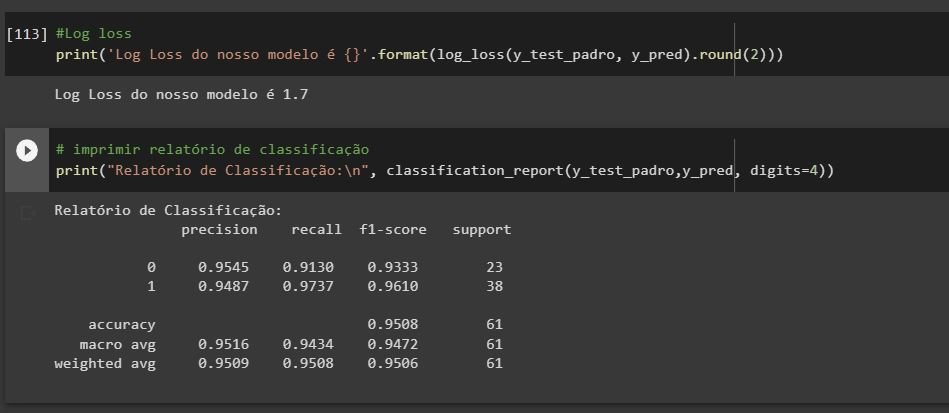

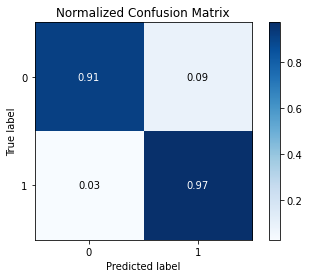

Vamos passar valores que o nosso modelo não conhece, o ideal era ter retirado algumas amostras do próprio dataset, como não foi feito, vamos inventar alguns valores :)

In [160]:
input = np.array([[68,144.0,193.0,141.0,3.4,0,1,1,0,0,0,0,1,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1], #0
                  [63,145.0,233.0,150.0,2.3,0,1,0,0,0,1,0,1,1,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0], #1
                  [35,100.0,220.0,143.0,0.0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1]  #?
                ])

#Padronizando os valores
scaler_standard_2 = StandardScaler()

#input padronizado
input_padro = scaler_standard_2.fit_transform(input)

#Output
output = reglog.predict(input_padro)
output

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"


array([0, 1, 1])

# Deployment